In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os,sys
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [3]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [4]:
#read in the general csv too
#df_general  = pd.read_csv("/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/delta_scores.csv")

In [5]:
#read in the general csv too
df_general  = pd.read_csv("/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/refined_placements_scoring_deltas.csv")

In [6]:
#get rid of weird 0 ddg values
df_general = df_general[df_general['ddg_compare'] != 0]

In [7]:
len(df_general)

9213

In [8]:
df_general

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37
0,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_271/placements_27130_3/7sr8_receptor_only_PV-001252093646_3_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/PV-001252093646/placements/7sr8_receptor_only_PV-001252093646_8_0.pdb,-14.149882,-14.132531,-0.017351,12.0,13.0,-1.0,2.0,2.0,0.0,0.083333,0.076923,0.006410,0,0,0.0,0.000000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,99.933451,100.944392,-1.010941,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_271/placements_27130_3/7sr8_receptor_only_PV-001252093646_3_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_271/placements_27130_3/7sr8_receptor_only_PV-001252093646_3_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_271/placements_27130_3/7sr8_receptor_only_PV-001252093646_3_0.pdb,0.289565,0.2,NaN
1,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_271/placements_27130_3/7sr8_receptor_only_PV-001252093646_3_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/PV-001252093646/placements/7sr8_receptor_only_PV-001252093646_32_0.pdb,-14.149882,-14.092806,-0.057076,12.0,12.0,0.0,2.0,2.0,0.0,0.083333,0.083333,0.000000,0,0,0.0,0.000000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,99.933451,99.990527,-0.057076,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_271/placements_27130_3/7sr8_receptor_only_PV-001252093646_3_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_271/placements_27130_3/7sr8_receptor_only_PV-001252093646_3_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_271/placements_27130_3/7sr8_receptor_only_PV-001252093646_3_0.pdb,0.185028,0.0,NaN
2,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/PV-002086402141/placements/7sr8_receptor_only_PV-002086402141_49_0.pdb,-15.362604,-15.649716,0.287112,8.0,8.0,0.0,2.0,2.0,0.0,0.125000,0.125000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,94.762396,94.475284,0.287112,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,0.134412,0.2,NaN
3,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/PV-002086402141/placements/7sr8_receptor_only_PV-002086402141_47_0.pdb,-15.362604,-15.605442,0.242838,8.0,9.0,-1.0,2.0,2.0,0.0,0.125000,0.111111,0.013889,0,1,-1.0,0.000000,-0.063842,0.063842,100,100,0.0,0,0,0.0,0,0,0.0,94.7623

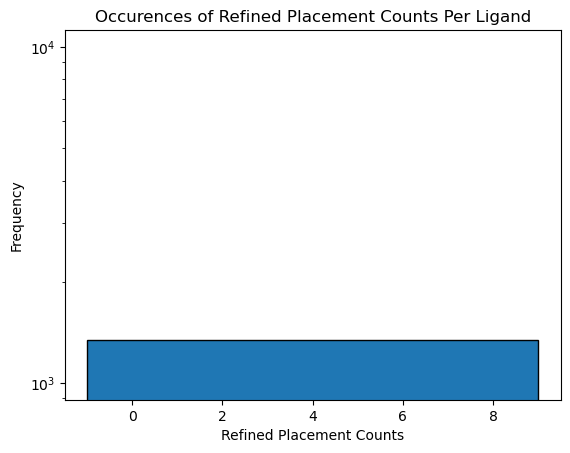

In [12]:
#derive counts of how many times the initial ligands appear to determine how many placements they get
#df_general['file_initial'].value_counts()
counts = df_general['file_initial'].value_counts()

bin_edges = np.arange(-1, 10, 10)

plt.yscale('log')

#plt.ylim(0,10000)

#create histogram
plt.hist(counts, bins=bin_edges, align = 'mid', edgecolor='black')

# Label axes and add a title
plt.xlabel('Refined Placement Counts')
plt.ylabel('Frequency')
plt.title('Occurences of Refined Placement Counts Per Ligand')

# Show the plot
plt.show()

In [14]:
# Extract ligand names using a regular expression
df_general['ligand_name'] = df_general['file_compare'].str.extract(r'7sr8_receptor_only_(.+?)_\d+_\d+\.pdb')

# Find the unique ligand names and their count
unique_ligands_general = df_general['ligand_name'].unique()
num_unique_ligands_general = len(unique_ligands_general)

# Display the unique ligand names and the count
#print("Unique Ligand Names:", unique_ligands_general)
print("Number of Unique Ligands:", num_unique_ligands_general)

Number of Unique Ligands: 1503


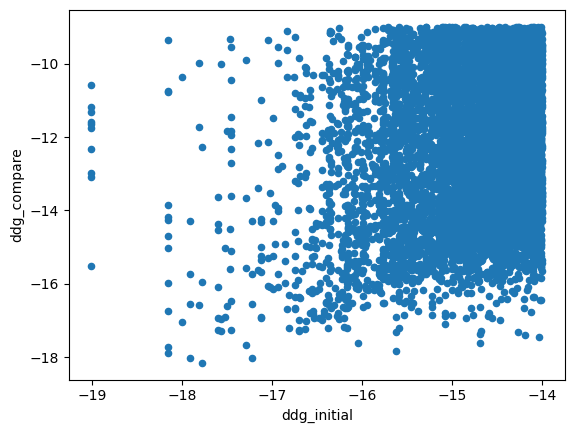

In [15]:
df_general.plot(kind='scatter',x='ddg_initial',y='ddg_compare')
plt.show()

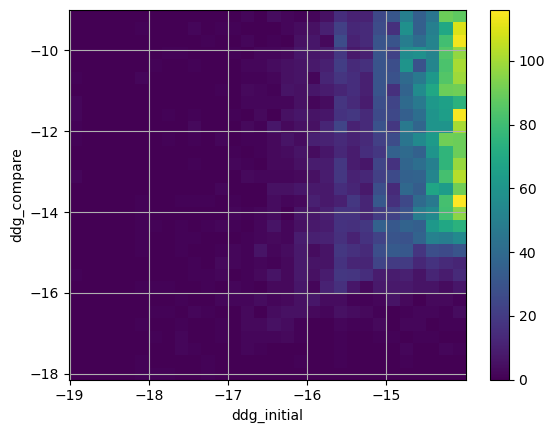

In [17]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs
#Expanding x and y max to 10
#Using Blues color scale to allow for zeros to be white

x = df_general['ddg_initial']
y = df_general['ddg_compare']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(30, 30))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('ddg_initial')
plt.ylabel('ddg_compare')

#plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', aspect='auto')
plt.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto')

plt.colorbar()

#plt.ylim(-24,-9)
#plt.xlim(-24,-9)

plt.grid(True)
plt.show()

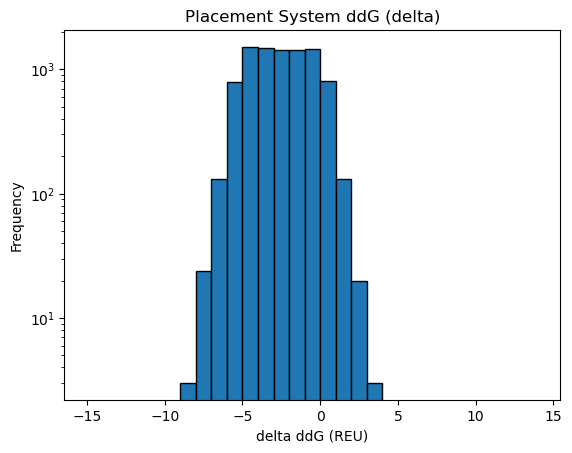

In [18]:
#plot the delta ddg in histogram
x = df_general['ddg_delta']
#set labels and title
plt.xlabel('delta ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement System ddG (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-15, 15, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

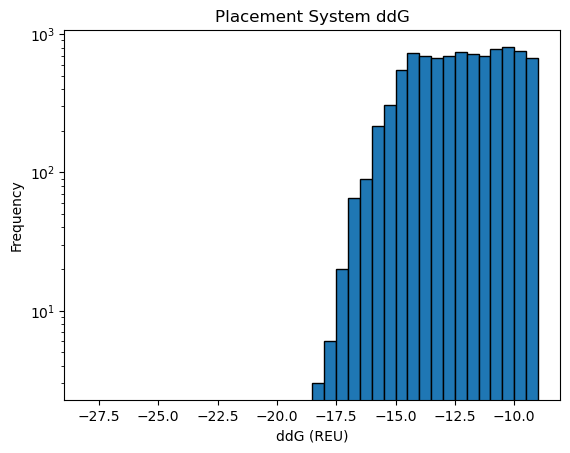

In [19]:
#plot the delta ddg in histogram
x = df_general['ddg_compare']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement System ddG')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-28, -8.5, 0.5)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

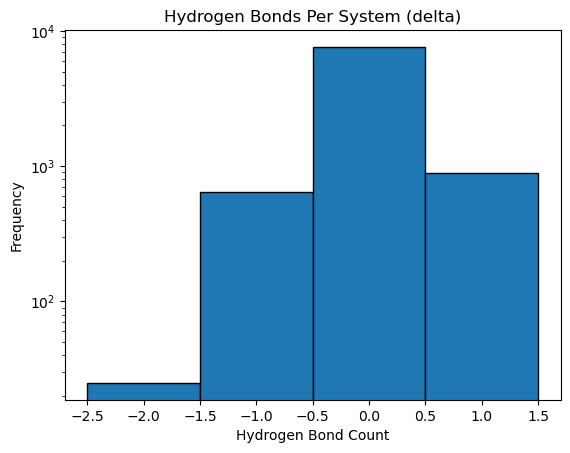

In [21]:
#plot the delta ddg in histogram
x = df_general['hbond_motif_count_delta']
#set labels and title
plt.xlabel('Hydrogen Bond Count')
plt.ylabel('Frequency')
plt.title('Hydrogen Bonds Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

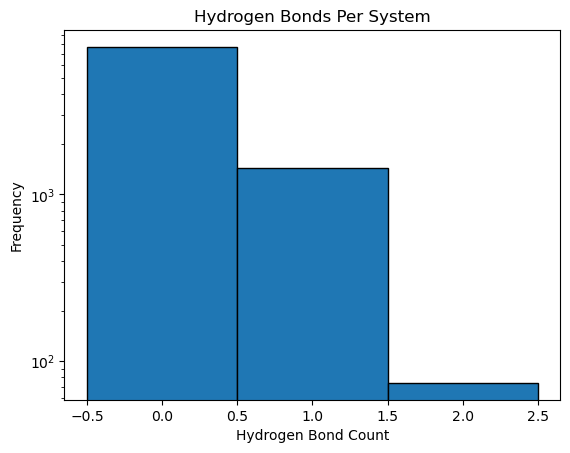

In [22]:
#plot the delta ddg in histogram
x = df_general['hbond_motif_count_compare']
#set labels and title
plt.xlabel('Hydrogen Bond Count')
plt.ylabel('Frequency')
plt.title('Hydrogen Bonds Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

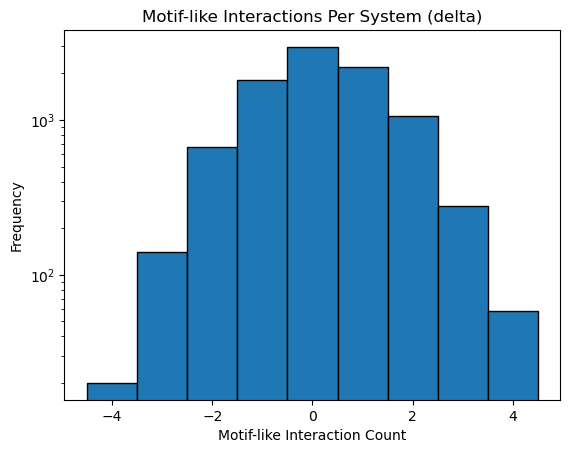

In [23]:
#plot the delta ddg in histogram
x = df_general['total_motifs_delta']
#set labels and title
plt.xlabel('Motif-like Interaction Count')
plt.ylabel('Frequency')
plt.title('Motif-like Interactions Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

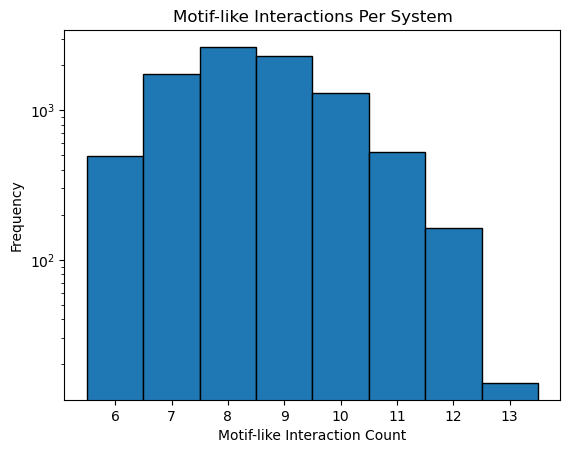

In [24]:
#plot the delta ddg in histogram
x = df_general['total_motifs_compare']
#set labels and title
plt.xlabel('Motif-like Interaction Count')
plt.ylabel('Frequency')
plt.title('Motif-like Interactions Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

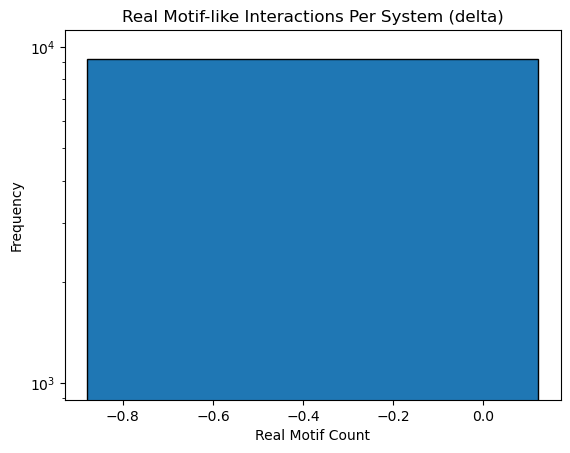

In [25]:
#plot the delta ddg in histogram
x = df_general['total_motifs_delta'] * df_general['real_motif_ratio_delta']
#set labels and title
plt.xlabel('Real Motif Count')
plt.ylabel('Frequency')
plt.title('Real Motif-like Interactions Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

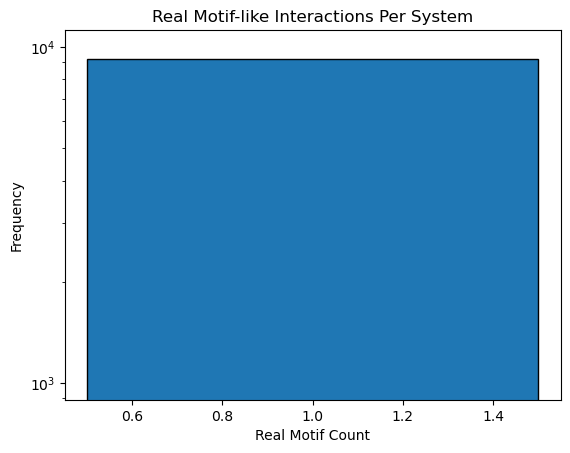

In [26]:
#plot the delta ddg in histogram
x = df_general['total_motifs_compare'] * df_general['real_motif_ratio_compare']
#set labels and title
plt.xlabel('Real Motif Count')
plt.ylabel('Frequency')
plt.title('Real Motif-like Interactions Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

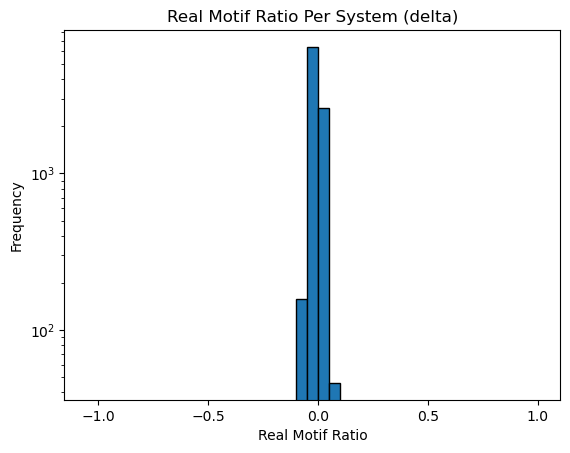

In [27]:
#plot the delta ddg in histogram
x = df_general['real_motif_ratio_delta']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-1.05, 1.05, 0.05)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

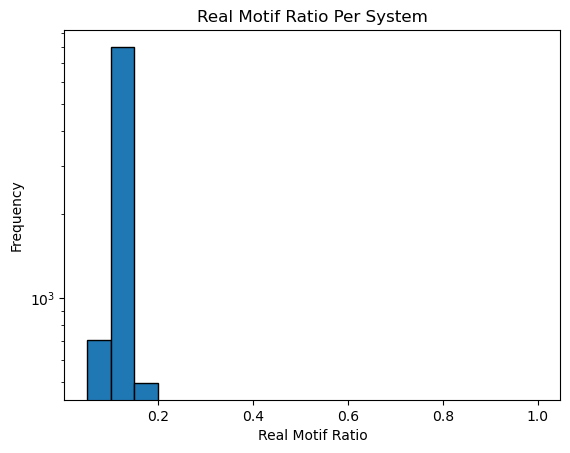

In [28]:
#plot the delta ddg in histogram
x = df_general['real_motif_ratio_compare']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(0.05, 1.05, 0.05)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

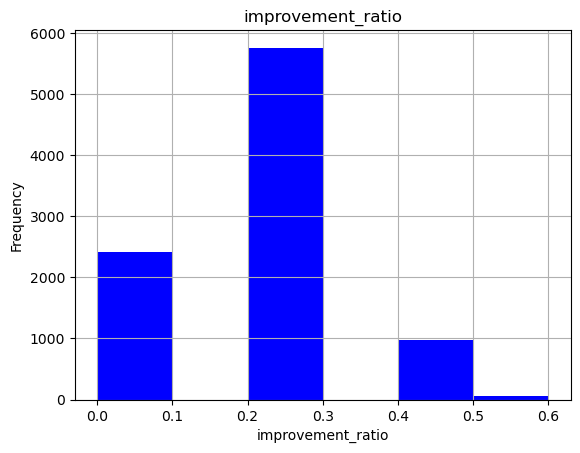

In [29]:
#plot the delta ddg in histogram
x = df_general['improvement_ratio']
#set labels and title
plt.xlabel('improvement_ratio')
plt.ylabel('Frequency')
plt.title('improvement_ratio')
#create 30 bin 1D hsitogram
plt.hist(x, bins=6, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [76]:
#filter down the general dataframe to only include placements where they meet the following criteria:
#rmsd < 6
#ddg_delta is positive
#real motif ratio is >= 0.5
#at least 3 rosetta hbonds
#ddg < -15
#
#
#

df_general_filtered = df_general[(df_general['hbond_motif_count_compare'] >= 0) & (df_general['rmsd'] <= 4) & (df_general['real_motif_ratio_compare'] >= 0) & (df_general['ddg_delta'] > 0) & (df_general['ddg_compare'] <= -14)]

In [77]:
df_general_filtered

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name
2,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/PV-002086402141/placements/7sr8_receptor_only_PV-002086402141_49_0.pdb,-15.362604,-15.649716,0.287112,8.0,8.0,0.0,2.0,2.0,0.0,0.125000,0.125000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,94.762396,94.475284,0.287112,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,0.134412,0.2,NaN,PV-002086402141
3,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/PV-002086402141/placements/7sr8_receptor_only_PV-002086402141_47_0.pdb,-15.362604,-15.605442,0.242838,8.0,9.0,-1.0,2.0,2.0,0.0,0.125000,0.111111,0.013889,0,1,-1.0,0.000000,-0.063842,0.063842,100,100,0.0,0,0,0.0,0,0,0.0,94.762396,96.441827,-1.679431,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,1.534930,0.6,NaN,PV-002086402141
11,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/PV-002086402141/placements/7sr8_receptor_only_PV-002086402141_37_0.pdb,-15.362604,-15.603405,0.240801,8.0,8.0,0.0,2.0,2.0,0.0,0.125000,0.125000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,94.762396,94.521595,0.240801,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,0.420277,0.2,NaN,PV-002086402141
12,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/PV-002086402141/placements/7sr8_receptor_only_PV-002086402141_62_0.pdb,-15.362604,-15.505410,0.142806,8.0,7.0,1.0,2.0,2.0,0.0,0.125000,0.142857,-0.017857,0,0,0.0,0.000000,0.0000

In [78]:
len(df_general_filtered)

952

In [45]:
#filter down the general dataframe to only include placements where they meet the following criteria:
#rmsd < 6
#ddg_delta is positive
#real motif ratio is >= 0.5
#at least 3 rosetta hbonds
#ddg < -15
#
#
#

df_general_filtered_lite = df_general[(df_general['real_motif_ratio_compare'] >= 0.5)]

In [46]:
df_general_filtered_lite

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name


In [47]:
len(df_general_filtered_lite)

0

In [48]:
#get a count on the number of placements that are very close to the original placement
df_recoveries = df_general

#get rid of weird 0 ddg values
df_recoveries = df_recoveries[df_recoveries['ddg_compare'] != 0]

df_recoveries = df_recoveries[df_recoveries['rmsd'] < 1]

In [49]:
len(df_recoveries)

4241

In [50]:
#aggregate by file_initial
closest_recovery_general_df = df_general.loc[df_general.groupby('file_initial')['rmsd'].idxmin()]

In [51]:
len(closest_recovery_general_df)

1582

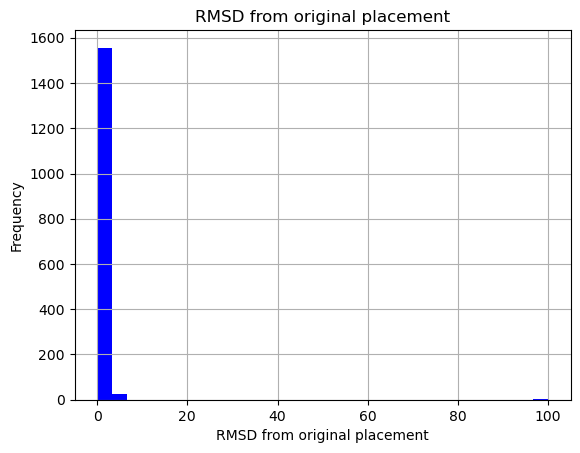

In [52]:
#plot the delta ddg in histogram
x = closest_recovery_general_df['rmsd']
#set labels and title
plt.xlabel('RMSD from original placement')
plt.ylabel('Frequency')
plt.title('RMSD from original placement')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [53]:
systems_with_a_close_recovery_df = closest_recovery_general_df[closest_recovery_general_df['ddg_compare'] != 0]
systems_with_a_close_recovery_df = systems_with_a_close_recovery_df[systems_with_a_close_recovery_df['rmsd'] < 4]
len(systems_with_a_close_recovery_df)

1565

In [54]:
len(systems_with_a_close_recovery_df)/len(closest_recovery_general_df)

0.9892541087231352

In [55]:
systems_with_a_close_recovery_df

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name
6860,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_100/placements_10023_2/7sr8_receptor_only_Z2704535499_2_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/Z2704535499/placements/7sr8_receptor_only_Z2704535499_106_0.pdb,-14.765876,-14.150831,-0.615045,10.0,10.0,0.0,2.0,2.0,0.0,0.100000,0.100000,0.000000,0,0,0.0,0.0,0.0,0.0,100,100,0.0,0,0,0.0,0,0,0.0,97.334124,97.949169,-0.615045,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_100/placements_10023_2/7sr8_receptor_only_Z2704535499_2_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_100/placements_10023_2/7sr8_receptor_only_Z2704535499_2_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_100/placements_10023_2/7sr8_receptor_only_Z2704535499_2_0.pdb,0.513049,0.0,NaN,Z2704535499
2997,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_100/placements_10023_6/7sr8_receptor_only_Z1309339882_14_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/Z1309339882/placements/7sr8_receptor_only_Z1309339882_154_0.pdb,-14.035717,-11.971703,-2.064014,8.0,7.0,1.0,2.0,2.0,0.0,0.125000,0.142857,-0.017857,0,0,0.0,0.0,0.0,0.0,100,100,0.0,0,0,0.0,0,0,0.0,96.089283,97.171154,-1.081871,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_100/placements_10023_6/7sr8_receptor_only_Z1309339882_14_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_100/placements_10023_6/7sr8_receptor_only_Z1309339882_14_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_100/placements_10023_6/7sr8_receptor_only_Z1309339882_14_0.pdb,0.863929,0.2,NaN,Z1309339882
4086,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_100/placements_10027_6/7sr8_receptor_only_Z1620576411_8_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/Z1620576411/placements/7sr8_receptor_only_Z1620576411_23_0.pdb,-14.624032,-9.528984,-5.095048,9.0,6.0,3.0,2.0,2.0,0.0,0.111111,0.166667,-0.055556,0,0,0.0,0.0,0.0,0.0,100,100,0.0,0,0,0.0,0,0,0.0,96.487079,98.637683,-2.150604,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_100/placements_10027_6/7sr8_receptor_only_Z1620576411_8_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_100/placements_10027_6/7sr8_receptor_only_Z1620576411_8_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_100/placements_10027_6/7sr8_receptor_only_Z1620576411_8_0.pdb,1.203502,0.2,NaN,Z1620576411
3669,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_100/placements_10046_0/7sr8_receptor_only_Z1521963760_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/Z1521963760/placements/7sr8_receptor_only_Z1521963760_116_0.pdb,-14.534044,-14.324489,-0.209555,8.0,7.0,1.0,2.0,2.0,0.0,0.125000,0.142857,-0.017857,0,0,0.0,0.0,0.0,0.0,100,100,0.0,0,0,0.0,0,0,0.0,95.590956,94.818368,0.772588,/data/project/thymelab/7sr8_placement_pulldown_spac

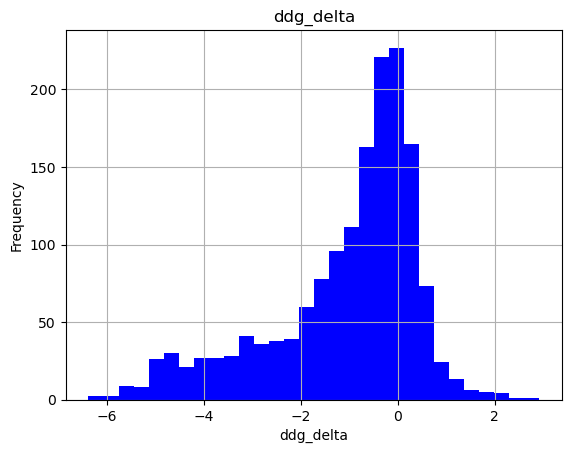

In [56]:
#plot the delta ddg in histogram
x = closest_recovery_general_df['ddg_delta']
#set labels and title
plt.xlabel('ddg_delta')
plt.ylabel('Frequency')
plt.title('ddg_delta')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [57]:
#grab the systems that did not recover and take a look
systems_without_a_close_recovery_df = closest_recovery_general_df[closest_recovery_general_df['ddg_compare'] != 0]
systems_without_a_close_recovery_df = systems_without_a_close_recovery_df[systems_without_a_close_recovery_df['rmsd'] > 4]
len(systems_without_a_close_recovery_df)

17

In [58]:
len(systems_without_a_close_recovery_df)/len(closest_recovery_general_df)

0.010745891276864728

In [59]:
systems_without_a_close_recovery_df

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name
6548,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_135/placements_13555_7/7sr8_receptor_only_Z2504421330_2_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/Z2504421330/placements/7sr8_receptor_only_Z2504421330_108_0.pdb,-14.153868,-11.454358,-2.699510,8.0,8.0,0.0,2.0,2.0,0.0,0.125000,0.125000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,95.971132,98.670642,-2.699510,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_135/placements_13555_7/7sr8_receptor_only_Z2504421330_2_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_135/placements_13555_7/7sr8_receptor_only_Z2504421330_2_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_135/placements_13555_7/7sr8_receptor_only_Z2504421330_2_0.pdb,5.609924,0.0,NaN,Z2504421330
6347,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_136/placements_13618_8/7sr8_receptor_only_Z2435207445_6_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/Z2435207445/placements/7sr8_receptor_only_Z2435207445_15_0.pdb,-14.306107,-12.502916,-1.803191,7.0,7.0,0.0,2.0,2.0,0.0,0.142857,0.142857,0.000000,0,0,0.0,0.000000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,94.836750,96.639941,-1.803191,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_136/placements_13618_8/7sr8_receptor_only_Z2435207445_6_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_136/placements_13618_8/7sr8_receptor_only_Z2435207445_6_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_136/placements_13618_8/7sr8_receptor_only_Z2435207445_6_0.pdb,5.412303,0.0,NaN,Z2435207445
2926,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_139/placements_13958_9/7sr8_receptor_only_Z1271203110_12_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/Z1271203110/placements/7sr8_receptor_only_Z1271203110_161_0.pdb,-14.507683,-9.740579,-4.767104,8.0,7.0,1.0,2.0,2.0,0.0,0.125000,0.142857,-0.017857,1,1,0.0,-0.882052,-0.520850,-0.361202,100,100,0.0,0,0,0.0,0,0,0.0,95.735265,99.881428,-4.146163,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_139/placements_13958_9/7sr8_receptor_only_Z1271203110_12_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_139/placements_13958_9/7sr8_receptor_only_Z1271203110_12_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_139/placements_13958_9/7sr8_receptor_only_Z1271203110_12_0.pdb,100.000000,0.2,NaN,Z1271203110
5458,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_141/placements_14159_5/7sr8_receptor_only_Z2073318729_13_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/Z2073318729/placements/7sr8_receptor_only_Z2073318729_182_0.pdb,-16.017809,-10.692039,-5.325770,9.0,10.0,-1.0,2.0,2.0,0.0,0.111111,0.100000,0.011111,0,0,0.0,0.000000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,95.093302,101.40

In [60]:
#get close rmsd placements with overall improvements
df_general_complete_improvements = df_general[(df_general['rmsd'] <= 6) & (df_general['improvement_ratio'] >= 1)]
len(df_general_complete_improvements)
df_general_complete_improvements

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name


In [61]:
#get close rmsd placements with overall improvements
df_general_0_8_improvements = df_general[(df_general['rmsd'] <= 6) & (df_general['improvement_ratio'] >= 0.8)]
len(df_general_0_8_improvements)
df_general_0_8_improvements

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name


In [62]:
#get close rmsd placements with overall improvements
df_general_high_hbonds = df_general[(df_general['rmsd'] <= 4) & (df_general['hbond_motif_count_delta'] <= -1) & (df_general['hbond_motif_count_compare'] >= 3) & (df_general['ddg_delta'] >= 0) & (df_general['ddg_compare'] <= -15) & (df_general['real_motif_ratio_compare'] >= 0.25)]
len(df_general_high_hbonds)


0

/share/apps/rc/software/Anaconda3/2023.07-2/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig.canvas.print_figure(bytes_io, **kw)


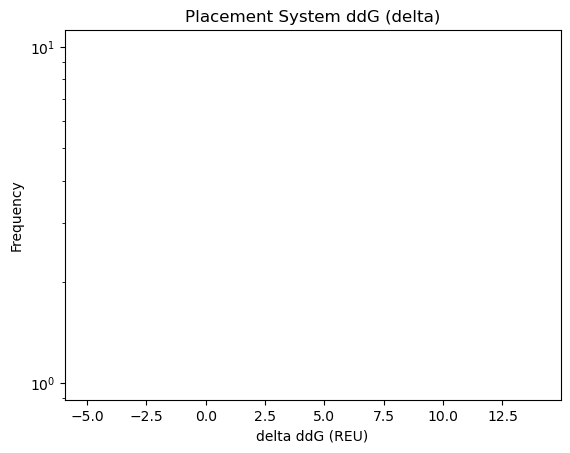

In [63]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['ddg_delta']
#set labels and title
plt.xlabel('delta ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement System ddG (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-5, 15, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

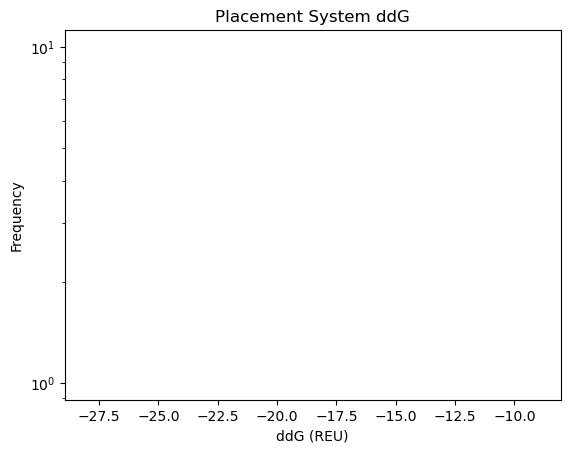

In [64]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['ddg_compare']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement System ddG')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-28, -8.5, 0.5)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

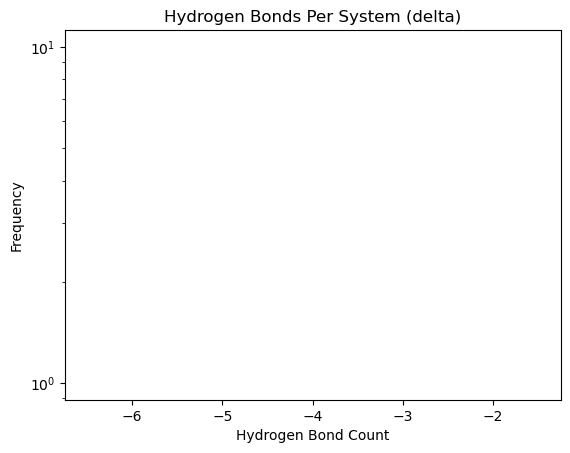

In [65]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['hbond_motif_count_delta']
#set labels and title
plt.xlabel('Hydrogen Bond Count')
plt.ylabel('Frequency')
plt.title('Hydrogen Bonds Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-6.5, -0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

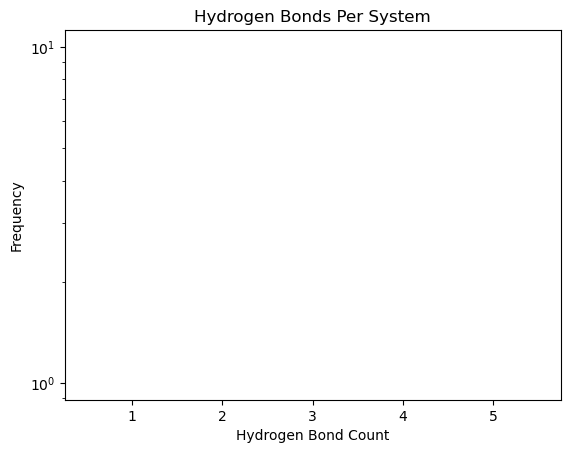

In [66]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['hbond_motif_count_compare']
#set labels and title
plt.xlabel('Hydrogen Bond Count')
plt.ylabel('Frequency')
plt.title('Hydrogen Bonds Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(0.5, 6, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

ValueError: min() arg is an empty sequence

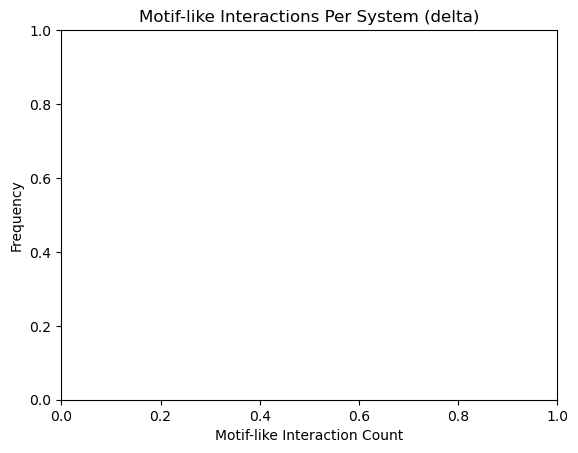

In [67]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['total_motifs_delta']
#set labels and title
plt.xlabel('Motif-like Interaction Count')
plt.ylabel('Frequency')
plt.title('Motif-like Interactions Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

ValueError: min() arg is an empty sequence

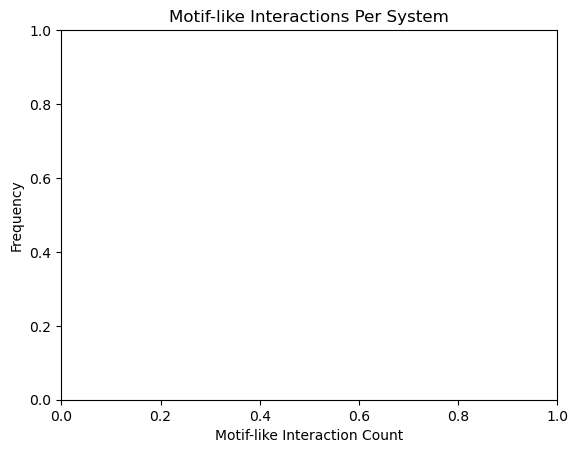

In [68]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['total_motifs_compare']
#set labels and title
plt.xlabel('Motif-like Interaction Count')
plt.ylabel('Frequency')
plt.title('Motif-like Interactions Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

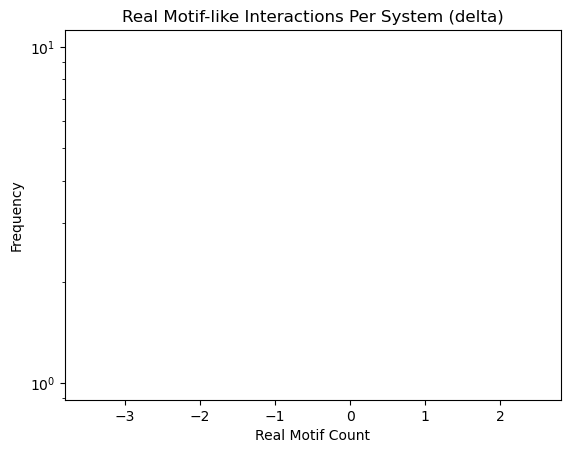

In [69]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['total_motifs_delta'] * df_general_high_hbonds['real_motif_ratio_delta']
#set labels and title
plt.xlabel('Real Motif Count')
plt.ylabel('Frequency')
plt.title('Real Motif-like Interactions Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-3.5, 3, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

ValueError: min() arg is an empty sequence

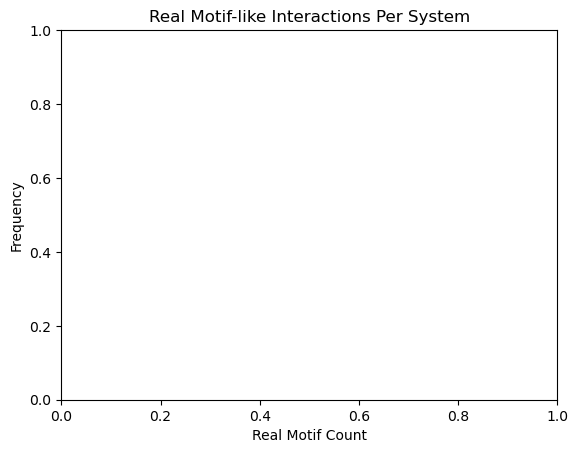

In [70]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['total_motifs_compare'] * df_general_high_hbonds['real_motif_ratio_compare']
#set labels and title
plt.xlabel('Real Motif Count')
plt.ylabel('Frequency')
plt.title('Real Motif-like Interactions Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

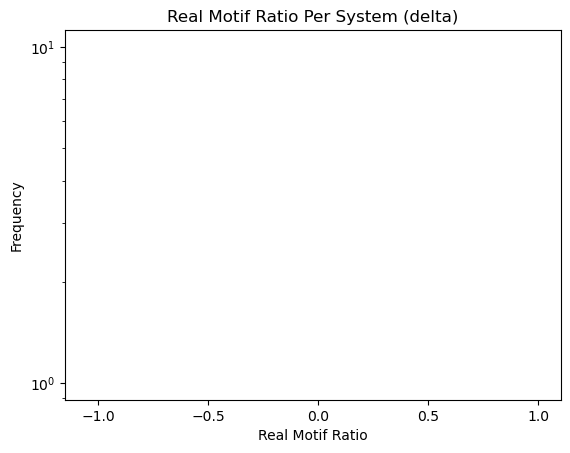

In [71]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['real_motif_ratio_delta']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-1.05, 1.05, 0.05)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

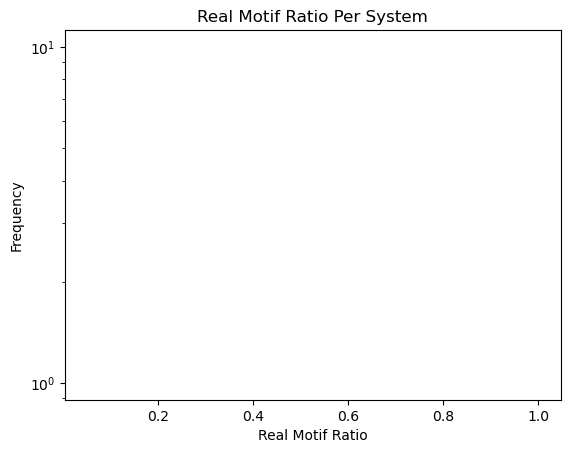

In [72]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['real_motif_ratio_compare']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(0.05, 1.05, 0.05)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

In [79]:
df_general_filtered

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name
2,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/PV-002086402141/placements/7sr8_receptor_only_PV-002086402141_49_0.pdb,-15.362604,-15.649716,0.287112,8.0,8.0,0.0,2.0,2.0,0.0,0.125000,0.125000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,94.762396,94.475284,0.287112,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,0.134412,0.2,NaN,PV-002086402141
3,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/PV-002086402141/placements/7sr8_receptor_only_PV-002086402141_47_0.pdb,-15.362604,-15.605442,0.242838,8.0,9.0,-1.0,2.0,2.0,0.0,0.125000,0.111111,0.013889,0,1,-1.0,0.000000,-0.063842,0.063842,100,100,0.0,0,0,0.0,0,0,0.0,94.762396,96.441827,-1.679431,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,1.534930,0.6,NaN,PV-002086402141
11,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/PV-002086402141/placements/7sr8_receptor_only_PV-002086402141_37_0.pdb,-15.362604,-15.603405,0.240801,8.0,8.0,0.0,2.0,2.0,0.0,0.125000,0.125000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,94.762396,94.521595,0.240801,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,0.420277,0.2,NaN,PV-002086402141
12,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/PV-002086402141/placements/7sr8_receptor_only_PV-002086402141_62_0.pdb,-15.362604,-15.505410,0.142806,8.0,7.0,1.0,2.0,2.0,0.0,0.125000,0.142857,-0.017857,0,0,0.0,0.000000,0.0000

In [80]:
len(df_general_filtered)

952

In [82]:
#filter the general so that it only has the lowest ddg for each ligand
df_filtered = df_general_filtered.loc[df_general_filtered.groupby("ligand_name")["ddg_compare"].idxmin()]
df_filtered

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name
2,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/PV-002086402141/placements/7sr8_receptor_only_PV-002086402141_49_0.pdb,-15.362604,-15.649716,0.287112,8.0,8.0,0.0,2.0,2.0,0.0,0.125000,0.125000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,94.762396,94.475284,0.287112,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_66/placements_06638_4/7sr8_receptor_only_PV-002086402141_9_0.pdb,0.134412,0.2,NaN,PV-002086402141
41,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_149/placements_14937_8/7sr8_receptor_only_PV-002090062426_8_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/PV-002090062426/placements/7sr8_receptor_only_PV-002090062426_68_0.pdb,-14.752212,-15.817421,1.065209,7.0,7.0,0.0,2.0,2.0,0.0,0.142857,0.142857,0.000000,0,0,0.0,0.000000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,94.390645,93.325436,1.065209,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_149/placements_14937_8/7sr8_receptor_only_PV-002090062426_8_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_149/placements_14937_8/7sr8_receptor_only_PV-002090062426_8_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_149/placements_14937_8/7sr8_receptor_only_PV-002090062426_8_0.pdb,0.496584,0.2,NaN,PV-002090062426
44,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_157/placements_15741_8/7sr8_receptor_only_PV-002098384100_7_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/PV-002098384100/placements/7sr8_receptor_only_PV-002098384100_3_0.pdb,-14.933027,-15.078683,0.145656,7.0,7.0,0.0,2.0,2.0,0.0,0.142857,0.142857,0.000000,0,0,0.0,0.000000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,94.209830,94.064174,0.145656,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_157/placements_15741_8/7sr8_receptor_only_PV-002098384100_7_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_157/placements_15741_8/7sr8_receptor_only_PV-002098384100_7_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_157/placements_15741_8/7sr8_receptor_only_PV-002098384100_7_0.pdb,0.153819,0.2,NaN,PV-002098384100
48,/data/project/thymelab/7sr8_placement_pulldown_space/superchunk_225/placements_22598_1/7sr8_receptor_only_PV-002098694114_11_0.pdb,/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/PV-002098694114/placements/7sr8_receptor_only_PV-002098694114_22_0.pdb,-14.784522,-14.918803,0.134281,10.0,9.0,1.0,2.0,2.0,0.0,0.100000,0.111111,-0.011111,0,0,0.0,0.000000

In [83]:
# Extract ligand names using a regular expression
df_filtered['ligand_name'] = df_filtered['file_compare'].str.extract(r'7sr8_receptor_only_(.+?)_\d+_\d+\.pdb')

# Find the unique ligand names and their count
unique_ligands = df_filtered['ligand_name'].unique()
num_unique_ligands = len(unique_ligands)

# Display the unique ligand names and the count
print("Unique Ligand Names:", unique_ligands)
print("Number of Unique Ligands:", num_unique_ligands)

Unique Ligand Names: ['PV-002086402141' 'PV-002090062426' 'PV-002098384100' 'PV-002098694114'
 'PV-002106909097' 'PV-002108644712' 'PV-002113911782' 'PV-002120675484'
 'PV-002146123093' 'PV-002176982041' 'PV-002215145297' 'PV-002230297567'
 'PV-002231103946' 'PV-002241102741' 'PV-002256682824' 'PV-002258677239'
 'PV-002267988197' 'PV-002290379823' 'PV-002302913216' 'PV-002312571365'
 'PV-002316243807' 'PV-002337869067' 'PV-002341605201' 'PV-002350480774'
 'PV-002402160571' 'PV-002405606195' 'PV-002447052820' 'PV-002457584878'
 'PV-002482650957' 'PV-002495891305' 'PV-002498952569' 'PV-002508365338'
 'PV-002548869495' 'PV-002549683689' 'PV-002549929687' 'PV-002577595819'
 'PV-002584071014' 'PV-002737218401' 'PV-002926242946' 'PV-003039885769'
 'PV-003098554947' 'PV-003281813153' 'PV-003298810727' 'PV-003432314834'
 'PV-003436336114' 'PV-003509895558' 'PV-003563586649' 'PV-003686263133'
 'PV-003690095549' 'PV-003742807262' 'PV-003820708971' 'PV-003912232836'
 'PV-003934724365' 'PV-0039599

In [99]:
"""
for i in df_general_high_hbonds['file_initial']:
    #print(i['file_initial'], i['file_compare'])
    print("cp " + i + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements")
"""

'\nfor i in df_general_high_hbonds[\'file_initial\']:\n    #print(i[\'file_initial\'], i[\'file_compare\'])\n    print("cp " + i + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements")\n'

In [84]:
line_counter = 0
folder_counter = 0

destination = "/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/"
if destination.endswith("/") == False:
    destination = destination + "/"

for index, row in df_filtered.iterrows():
    
    #make a string of line counter to be 5 digits long
    my_str = str(line_counter)
    while len(my_str) < 5:
        my_str = "0" + my_str
    
    os.system("mkdir " + destination + str(folder_counter))
    #print("cp " + row['file_initial'] + " " + row['file_compare'] + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/" + str(folder_counter))
    
    new_init = my_str + "_initial_" + row['file_initial'].split("/")[len(row['file_initial'].split("/")) - 1]
    new_comp = my_str + "_compare_" + row['file_compare'].split("/")[len(row['file_compare'].split("/")) - 1]
    
    print(new_init, new_comp)
    
    #os.system("cp " + row['file_initial'] + " " + row['file_compare'] + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/" + str(folder_counter))
    os.system("cp " + row['file_initial'] + " " + destination + str(folder_counter) + "/" + new_init)
    os.system("cp " + row['file_compare'] + " " + destination + str(folder_counter) + "/" + new_comp)
    os.system("sleep 0.1")
    
    line_counter = line_counter + 1
    
    if line_counter % 50 == 0:
        folder_counter = folder_counter + 1
        
#write the df_general_high_hbonds to csv
df_filtered.to_csv(destination + 'taklike_sulfonyl_ligands_to_investigate.csv', index=False)

00000_initial_7sr8_receptor_only_PV-002086402141_9_0.pdb 00000_compare_7sr8_receptor_only_PV-002086402141_49_0.pdb
00001_initial_7sr8_receptor_only_PV-002090062426_8_0.pdb 00001_compare_7sr8_receptor_only_PV-002090062426_68_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists


00002_initial_7sr8_receptor_only_PV-002098384100_7_0.pdb 00002_compare_7sr8_receptor_only_PV-002098384100_3_0.pdb
00003_initial_7sr8_receptor_only_PV-002098694114_11_0.pdb 00003_compare_7sr8_receptor_only_PV-002098694114_22_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists


00004_initial_7sr8_receptor_only_PV-002106909097_6_0.pdb 00004_compare_7sr8_receptor_only_PV-002106909097_109_0.pdb
00005_initial_7sr8_receptor_only_PV-002108644712_12_0.pdb 00005_compare_7sr8_receptor_only_PV-002108644712_53_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists


00006_initial_7sr8_receptor_only_PV-002113911782_7_0.pdb 00006_compare_7sr8_receptor_only_PV-002113911782_39_0.pdb
00007_initial_7sr8_receptor_only_PV-002120675484_14_0.pdb 00007_compare_7sr8_receptor_only_PV-002120675484_4_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists


00008_initial_7sr8_receptor_only_PV-002146123093_1_0.pdb 00008_compare_7sr8_receptor_only_PV-002146123093_13_0.pdb
00009_initial_7sr8_receptor_only_PV-002176982041_2_0.pdb 00009_compare_7sr8_receptor_only_PV-002176982041_18_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists


00010_initial_7sr8_receptor_only_PV-002215145297_8_0.pdb 00010_compare_7sr8_receptor_only_PV-002215145297_19_0.pdb
00011_initial_7sr8_receptor_only_PV-002230297567_9_0.pdb 00011_compare_7sr8_receptor_only_PV-002230297567_45_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists


00012_initial_7sr8_receptor_only_PV-002231103946_12_0.pdb 00012_compare_7sr8_receptor_only_PV-002231103946_85_0.pdb
00013_initial_7sr8_receptor_only_PV-002241102741_2_0.pdb 00013_compare_7sr8_receptor_only_PV-002241102741_8_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists


00014_initial_7sr8_receptor_only_PV-002256682824_9_0.pdb 00014_compare_7sr8_receptor_only_PV-002256682824_20_0.pdb
00015_initial_7sr8_receptor_only_PV-002258677239_13_0.pdb 00015_compare_7sr8_receptor_only_PV-002258677239_94_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists


00016_initial_7sr8_receptor_only_PV-002267988197_6_0.pdb 00016_compare_7sr8_receptor_only_PV-002267988197_78_0.pdb
00017_initial_7sr8_receptor_only_PV-002290379823_2_0.pdb 00017_compare_7sr8_receptor_only_PV-002290379823_59_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists


00018_initial_7sr8_receptor_only_PV-002302913216_7_0.pdb 00018_compare_7sr8_receptor_only_PV-002302913216_187_0.pdb
00019_initial_7sr8_receptor_only_PV-002312571365_5_0.pdb 00019_compare_7sr8_receptor_only_PV-002312571365_17_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists


00020_initial_7sr8_receptor_only_PV-002316243807_6_0.pdb 00020_compare_7sr8_receptor_only_PV-002316243807_88_0.pdb
00021_initial_7sr8_receptor_only_PV-002337869067_2_0.pdb 00021_compare_7sr8_receptor_only_PV-002337869067_22_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists


00022_initial_7sr8_receptor_only_PV-002341605201_4_0.pdb 00022_compare_7sr8_receptor_only_PV-002341605201_165_0.pdb
00023_initial_7sr8_receptor_only_PV-002350480774_2_0.pdb 00023_compare_7sr8_receptor_only_PV-002350480774_6_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists


00024_initial_7sr8_receptor_only_PV-002402160571_5_0.pdb 00024_compare_7sr8_receptor_only_PV-002402160571_211_0.pdb
00025_initial_7sr8_receptor_only_PV-002405606195_12_0.pdb 00025_compare_7sr8_receptor_only_PV-002405606195_108_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists


00026_initial_7sr8_receptor_only_PV-002447052820_7_0.pdb 00026_compare_7sr8_receptor_only_PV-002447052820_4_0.pdb
00027_initial_7sr8_receptor_only_PV-002457584878_11_0.pdb 00027_compare_7sr8_receptor_only_PV-002457584878_64_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists


00028_initial_7sr8_receptor_only_PV-002482650957_12_0.pdb 00028_compare_7sr8_receptor_only_PV-002482650957_13_0.pdb
00029_initial_7sr8_receptor_only_PV-002495891305_11_0.pdb 00029_compare_7sr8_receptor_only_PV-002495891305_105_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists


00030_initial_7sr8_receptor_only_PV-002498952569_3_0.pdb 00030_compare_7sr8_receptor_only_PV-002498952569_79_0.pdb
00031_initial_7sr8_receptor_only_PV-002508365338_1_0.pdb 00031_compare_7sr8_receptor_only_PV-002508365338_181_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists


00032_initial_7sr8_receptor_only_PV-002548869495_3_0.pdb 00032_compare_7sr8_receptor_only_PV-002548869495_77_0.pdb
00033_initial_7sr8_receptor_only_PV-002549683689_1_0.pdb 00033_compare_7sr8_receptor_only_PV-002549683689_23_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists


00034_initial_7sr8_receptor_only_PV-002549929687_12_0.pdb 00034_compare_7sr8_receptor_only_PV-002549929687_78_0.pdb
00035_initial_7sr8_receptor_only_PV-002577595819_3_0.pdb 00035_compare_7sr8_receptor_only_PV-002577595819_102_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists


00036_initial_7sr8_receptor_only_PV-002584071014_9_0.pdb 00036_compare_7sr8_receptor_only_PV-002584071014_119_0.pdb
00037_initial_7sr8_receptor_only_PV-002737218401_6_0.pdb 00037_compare_7sr8_receptor_only_PV-002737218401_48_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists


00038_initial_7sr8_receptor_only_PV-002926242946_10_0.pdb 00038_compare_7sr8_receptor_only_PV-002926242946_71_0.pdb
00039_initial_7sr8_receptor_only_PV-003039885769_12_0.pdb 00039_compare_7sr8_receptor_only_PV-003039885769_84_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists


00040_initial_7sr8_receptor_only_PV-003098554947_8_0.pdb 00040_compare_7sr8_receptor_only_PV-003098554947_40_0.pdb
00041_initial_7sr8_receptor_only_PV-003281813153_2_0.pdb 00041_compare_7sr8_receptor_only_PV-003281813153_2_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists


00042_initial_7sr8_receptor_only_PV-003298810727_10_0.pdb 00042_compare_7sr8_receptor_only_PV-003298810727_73_0.pdb
00043_initial_7sr8_receptor_only_PV-003432314834_5_0.pdb 00043_compare_7sr8_receptor_only_PV-003432314834_25_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists


00044_initial_7sr8_receptor_only_PV-003436336114_12_0.pdb 00044_compare_7sr8_receptor_only_PV-003436336114_27_0.pdb
00045_initial_7sr8_receptor_only_PV-003509895558_8_0.pdb 00045_compare_7sr8_receptor_only_PV-003509895558_24_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists


00046_initial_7sr8_receptor_only_PV-003563586649_1_0.pdb 00046_compare_7sr8_receptor_only_PV-003563586649_1_0.pdb
00047_initial_7sr8_receptor_only_PV-003686263133_9_0.pdb 00047_compare_7sr8_receptor_only_PV-003686263133_188_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists


00048_initial_7sr8_receptor_only_PV-003690095549_1_0.pdb 00048_compare_7sr8_receptor_only_PV-003690095549_159_0.pdb
00049_initial_7sr8_receptor_only_PV-003742807262_4_0.pdb 00049_compare_7sr8_receptor_only_PV-003742807262_70_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/0’: File exists


00050_initial_7sr8_receptor_only_PV-003820708971_6_0.pdb 00050_compare_7sr8_receptor_only_PV-003820708971_29_0.pdb
00051_initial_7sr8_receptor_only_PV-003912232836_4_0.pdb 00051_compare_7sr8_receptor_only_PV-003912232836_124_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists


00052_initial_7sr8_receptor_only_PV-003934724365_10_0.pdb 00052_compare_7sr8_receptor_only_PV-003934724365_2_0.pdb
00053_initial_7sr8_receptor_only_PV-003959908815_1_0.pdb 00053_compare_7sr8_receptor_only_PV-003959908815_129_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists


00054_initial_7sr8_receptor_only_PV-004016854273_11_0.pdb 00054_compare_7sr8_receptor_only_PV-004016854273_181_0.pdb
00055_initial_7sr8_receptor_only_PV-004098414945_9_0.pdb 00055_compare_7sr8_receptor_only_PV-004098414945_91_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists


00056_initial_7sr8_receptor_only_PV-004109005385_12_0.pdb 00056_compare_7sr8_receptor_only_PV-004109005385_37_0.pdb
00057_initial_7sr8_receptor_only_PV-004122999408_3_0.pdb 00057_compare_7sr8_receptor_only_PV-004122999408_31_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists


00058_initial_7sr8_receptor_only_PV-004148823196_5_0.pdb 00058_compare_7sr8_receptor_only_PV-004148823196_79_0.pdb
00059_initial_7sr8_receptor_only_PV-004201213282_6_0.pdb 00059_compare_7sr8_receptor_only_PV-004201213282_105_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists


00060_initial_7sr8_receptor_only_PV-004395949018_10_0.pdb 00060_compare_7sr8_receptor_only_PV-004395949018_166_0.pdb
00061_initial_7sr8_receptor_only_PV-004398175958_3_0.pdb 00061_compare_7sr8_receptor_only_PV-004398175958_71_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists


00062_initial_7sr8_receptor_only_PV-004417090505_4_0.pdb 00062_compare_7sr8_receptor_only_PV-004417090505_1_0.pdb
00063_initial_7sr8_receptor_only_PV-004499274650_12_0.pdb 00063_compare_7sr8_receptor_only_PV-004499274650_104_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists


00064_initial_7sr8_receptor_only_PV-004507436059_1_0.pdb 00064_compare_7sr8_receptor_only_PV-004507436059_10_0.pdb
00065_initial_7sr8_receptor_only_PV-004559484083_2_0.pdb 00065_compare_7sr8_receptor_only_PV-004559484083_25_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists


00066_initial_7sr8_receptor_only_PV-004602143191_6_0.pdb 00066_compare_7sr8_receptor_only_PV-004602143191_25_0.pdb
00067_initial_7sr8_receptor_only_PV-004618831748_3_0.pdb 00067_compare_7sr8_receptor_only_PV-004618831748_145_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists


00068_initial_7sr8_receptor_only_PV-004653460776_1_0.pdb 00068_compare_7sr8_receptor_only_PV-004653460776_45_0.pdb
00069_initial_7sr8_receptor_only_PV-004744620920_9_0.pdb 00069_compare_7sr8_receptor_only_PV-004744620920_56_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists


00070_initial_7sr8_receptor_only_PV-004820471704_6_0.pdb 00070_compare_7sr8_receptor_only_PV-004820471704_85_0.pdb
00071_initial_7sr8_receptor_only_PV-004877315159_8_0.pdb 00071_compare_7sr8_receptor_only_PV-004877315159_13_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists


00072_initial_7sr8_receptor_only_PV-005032031042_8_0.pdb 00072_compare_7sr8_receptor_only_PV-005032031042_83_0.pdb
00073_initial_7sr8_receptor_only_PV-005033276495_9_0.pdb 00073_compare_7sr8_receptor_only_PV-005033276495_120_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists


00074_initial_7sr8_receptor_only_PV-005086896768_1_0.pdb 00074_compare_7sr8_receptor_only_PV-005086896768_108_0.pdb
00075_initial_7sr8_receptor_only_PV-005106059739_4_0.pdb 00075_compare_7sr8_receptor_only_PV-005106059739_89_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists


00076_initial_7sr8_receptor_only_PV-005172704142_4_0.pdb 00076_compare_7sr8_receptor_only_PV-005172704142_124_0.pdb
00077_initial_7sr8_receptor_only_PV-005200556326_14_0.pdb 00077_compare_7sr8_receptor_only_PV-005200556326_30_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists


00078_initial_7sr8_receptor_only_PV-005239746783_14_0.pdb 00078_compare_7sr8_receptor_only_PV-005239746783_98_0.pdb
00079_initial_7sr8_receptor_only_PV-005242356259_3_0.pdb 00079_compare_7sr8_receptor_only_PV-005242356259_24_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists


00080_initial_7sr8_receptor_only_PV-005312435826_10_0.pdb 00080_compare_7sr8_receptor_only_PV-005312435826_57_0.pdb
00081_initial_7sr8_receptor_only_PV-005320974149_4_0.pdb 00081_compare_7sr8_receptor_only_PV-005320974149_6_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists


00082_initial_7sr8_receptor_only_PV-005350528477_9_0.pdb 00082_compare_7sr8_receptor_only_PV-005350528477_112_0.pdb
00083_initial_7sr8_receptor_only_PV-005365881688_14_0.pdb 00083_compare_7sr8_receptor_only_PV-005365881688_128_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists


00084_initial_7sr8_receptor_only_PV-005384787569_7_0.pdb 00084_compare_7sr8_receptor_only_PV-005384787569_41_0.pdb
00085_initial_7sr8_receptor_only_PV-005393510416_12_0.pdb 00085_compare_7sr8_receptor_only_PV-005393510416_10_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists


00086_initial_7sr8_receptor_only_PV-005512064872_1_0.pdb 00086_compare_7sr8_receptor_only_PV-005512064872_120_0.pdb
00087_initial_7sr8_receptor_only_PV-005520818996_6_0.pdb 00087_compare_7sr8_receptor_only_PV-005520818996_1_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists


00088_initial_7sr8_receptor_only_PV-005570599155_5_0.pdb 00088_compare_7sr8_receptor_only_PV-005570599155_32_0.pdb
00089_initial_7sr8_receptor_only_PV-005580302215_4_0.pdb 00089_compare_7sr8_receptor_only_PV-005580302215_38_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists


00090_initial_7sr8_receptor_only_PV-005616347103_4_0.pdb 00090_compare_7sr8_receptor_only_PV-005616347103_49_0.pdb
00091_initial_7sr8_receptor_only_PV-005736869775_12_0.pdb 00091_compare_7sr8_receptor_only_PV-005736869775_28_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists


00092_initial_7sr8_receptor_only_PV-005776110336_6_0.pdb 00092_compare_7sr8_receptor_only_PV-005776110336_65_0.pdb
00093_initial_7sr8_receptor_only_PV-005820922848_1_0.pdb 00093_compare_7sr8_receptor_only_PV-005820922848_145_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists


00094_initial_7sr8_receptor_only_PV-005825263933_12_0.pdb 00094_compare_7sr8_receptor_only_PV-005825263933_31_0.pdb
00095_initial_7sr8_receptor_only_PV-005924059693_6_0.pdb 00095_compare_7sr8_receptor_only_PV-005924059693_4_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists


00096_initial_7sr8_receptor_only_PV-005950727739_8_0.pdb 00096_compare_7sr8_receptor_only_PV-005950727739_42_0.pdb
00097_initial_7sr8_receptor_only_PV-005996831342_7_0.pdb 00097_compare_7sr8_receptor_only_PV-005996831342_132_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists


00098_initial_7sr8_receptor_only_PV-006011416235_1_0.pdb 00098_compare_7sr8_receptor_only_PV-006011416235_9_0.pdb
00099_initial_7sr8_receptor_only_PV-006070622336_9_0.pdb 00099_compare_7sr8_receptor_only_PV-006070622336_126_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/1’: File exists


00100_initial_7sr8_receptor_only_PV-006105711353_11_0.pdb 00100_compare_7sr8_receptor_only_PV-006105711353_72_0.pdb
00101_initial_7sr8_receptor_only_PV-006165031478_2_0.pdb 00101_compare_7sr8_receptor_only_PV-006165031478_222_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists


00102_initial_7sr8_receptor_only_PV-006185324045_4_0.pdb 00102_compare_7sr8_receptor_only_PV-006185324045_29_0.pdb
00103_initial_7sr8_receptor_only_PV-006193675753_15_0.pdb 00103_compare_7sr8_receptor_only_PV-006193675753_9_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists


00104_initial_7sr8_receptor_only_PV-006270404999_6_0.pdb 00104_compare_7sr8_receptor_only_PV-006270404999_1_0.pdb
00105_initial_7sr8_receptor_only_PV-006365968431_4_0.pdb 00105_compare_7sr8_receptor_only_PV-006365968431_7_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists


00106_initial_7sr8_receptor_only_PV-006428166318_5_0.pdb 00106_compare_7sr8_receptor_only_PV-006428166318_60_0.pdb
00107_initial_7sr8_receptor_only_PV-006480132545_11_0.pdb 00107_compare_7sr8_receptor_only_PV-006480132545_4_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists


00108_initial_7sr8_receptor_only_PV-006598182627_10_0.pdb 00108_compare_7sr8_receptor_only_PV-006598182627_72_0.pdb
00109_initial_7sr8_receptor_only_PV-006634242582_1_0.pdb 00109_compare_7sr8_receptor_only_PV-006634242582_18_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists


00110_initial_7sr8_receptor_only_PV-006652215953_3_0.pdb 00110_compare_7sr8_receptor_only_PV-006652215953_13_0.pdb
00111_initial_7sr8_receptor_only_PV-006668476301_12_0.pdb 00111_compare_7sr8_receptor_only_PV-006668476301_121_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists


00112_initial_7sr8_receptor_only_PV-006686673759_15_0.pdb 00112_compare_7sr8_receptor_only_PV-006686673759_46_0.pdb
00113_initial_7sr8_receptor_only_PV-006711630314_14_0.pdb 00113_compare_7sr8_receptor_only_PV-006711630314_6_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists


00114_initial_7sr8_receptor_only_Z1007105940_3_0.pdb 00114_compare_7sr8_receptor_only_Z1007105940_188_0.pdb
00115_initial_7sr8_receptor_only_Z1022210870_5_0.pdb 00115_compare_7sr8_receptor_only_Z1022210870_32_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists


00116_initial_7sr8_receptor_only_Z103993434_4_0.pdb 00116_compare_7sr8_receptor_only_Z103993434_15_0.pdb
00117_initial_7sr8_receptor_only_Z1043044506_5_0.pdb 00117_compare_7sr8_receptor_only_Z1043044506_154_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists


00118_initial_7sr8_receptor_only_Z1086437188_4_0.pdb 00118_compare_7sr8_receptor_only_Z1086437188_56_0.pdb
00119_initial_7sr8_receptor_only_Z1089618776_7_0.pdb 00119_compare_7sr8_receptor_only_Z1089618776_1_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists


00120_initial_7sr8_receptor_only_Z1119208315_9_0.pdb 00120_compare_7sr8_receptor_only_Z1119208315_21_0.pdb
00121_initial_7sr8_receptor_only_Z1119209648_3_0.pdb 00121_compare_7sr8_receptor_only_Z1119209648_44_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists


00122_initial_7sr8_receptor_only_Z1129023073_10_0.pdb 00122_compare_7sr8_receptor_only_Z1129023073_114_0.pdb
00123_initial_7sr8_receptor_only_Z1148612697_7_0.pdb 00123_compare_7sr8_receptor_only_Z1148612697_43_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists


00124_initial_7sr8_receptor_only_Z1150226415_13_0.pdb 00124_compare_7sr8_receptor_only_Z1150226415_107_0.pdb
00125_initial_7sr8_receptor_only_Z1153769717_3_0.pdb 00125_compare_7sr8_receptor_only_Z1153769717_87_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists


00126_initial_7sr8_receptor_only_Z1161518852_3_0.pdb 00126_compare_7sr8_receptor_only_Z1161518852_28_0.pdb
00127_initial_7sr8_receptor_only_Z1173456574_1_0.pdb 00127_compare_7sr8_receptor_only_Z1173456574_95_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists


00128_initial_7sr8_receptor_only_Z1176806402_6_0.pdb 00128_compare_7sr8_receptor_only_Z1176806402_134_0.pdb
00129_initial_7sr8_receptor_only_Z1180400247_8_0.pdb 00129_compare_7sr8_receptor_only_Z1180400247_38_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists


00130_initial_7sr8_receptor_only_Z1182371491_13_0.pdb 00130_compare_7sr8_receptor_only_Z1182371491_1_0.pdb
00131_initial_7sr8_receptor_only_Z1182402774_1_0.pdb 00131_compare_7sr8_receptor_only_Z1182402774_1_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists


00132_initial_7sr8_receptor_only_Z1188852501_1_0.pdb 00132_compare_7sr8_receptor_only_Z1188852501_1_0.pdb
00133_initial_7sr8_receptor_only_Z1190689011_2_0.pdb 00133_compare_7sr8_receptor_only_Z1190689011_8_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists


00134_initial_7sr8_receptor_only_Z1192425699_1_0.pdb 00134_compare_7sr8_receptor_only_Z1192425699_107_0.pdb
00135_initial_7sr8_receptor_only_Z1204170169_8_0.pdb 00135_compare_7sr8_receptor_only_Z1204170169_3_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists


00136_initial_7sr8_receptor_only_Z1212924853_13_0.pdb 00136_compare_7sr8_receptor_only_Z1212924853_1_0.pdb
00137_initial_7sr8_receptor_only_Z1212927890_2_0.pdb 00137_compare_7sr8_receptor_only_Z1212927890_109_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists


00138_initial_7sr8_receptor_only_Z1212928181_1_0.pdb 00138_compare_7sr8_receptor_only_Z1212928181_155_0.pdb
00139_initial_7sr8_receptor_only_Z1224831335_6_0.pdb 00139_compare_7sr8_receptor_only_Z1224831335_16_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists


00140_initial_7sr8_receptor_only_Z1232025544_13_0.pdb 00140_compare_7sr8_receptor_only_Z1232025544_32_0.pdb
00141_initial_7sr8_receptor_only_Z1232044964_13_0.pdb 00141_compare_7sr8_receptor_only_Z1232044964_85_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists


00142_initial_7sr8_receptor_only_Z1232900663_14_0.pdb 00142_compare_7sr8_receptor_only_Z1232900663_3_0.pdb
00143_initial_7sr8_receptor_only_Z1234071692_3_0.pdb 00143_compare_7sr8_receptor_only_Z1234071692_61_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists


00144_initial_7sr8_receptor_only_Z1234071695_9_0.pdb 00144_compare_7sr8_receptor_only_Z1234071695_62_0.pdb
00145_initial_7sr8_receptor_only_Z1252726483_6_0.pdb 00145_compare_7sr8_receptor_only_Z1252726483_88_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists


00146_initial_7sr8_receptor_only_Z1256489892_4_0.pdb 00146_compare_7sr8_receptor_only_Z1256489892_50_0.pdb
00147_initial_7sr8_receptor_only_Z1262307214_2_0.pdb 00147_compare_7sr8_receptor_only_Z1262307214_42_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists


00148_initial_7sr8_receptor_only_Z1266676945_4_0.pdb 00148_compare_7sr8_receptor_only_Z1266676945_12_0.pdb
00149_initial_7sr8_receptor_only_Z1269927464_11_0.pdb 00149_compare_7sr8_receptor_only_Z1269927464_182_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/2’: File exists


00150_initial_7sr8_receptor_only_Z1270952068_5_0.pdb 00150_compare_7sr8_receptor_only_Z1270952068_106_0.pdb
00151_initial_7sr8_receptor_only_Z1271114504_2_0.pdb 00151_compare_7sr8_receptor_only_Z1271114504_72_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists


00152_initial_7sr8_receptor_only_Z1271118172_13_0.pdb 00152_compare_7sr8_receptor_only_Z1271118172_4_0.pdb
00153_initial_7sr8_receptor_only_Z1271192131_4_0.pdb 00153_compare_7sr8_receptor_only_Z1271192131_79_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists


00154_initial_7sr8_receptor_only_Z1271255305_3_0.pdb 00154_compare_7sr8_receptor_only_Z1271255305_25_0.pdb
00155_initial_7sr8_receptor_only_Z1273948177_5_0.pdb 00155_compare_7sr8_receptor_only_Z1273948177_64_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists


00156_initial_7sr8_receptor_only_Z1274988693_1_0.pdb 00156_compare_7sr8_receptor_only_Z1274988693_92_0.pdb
00157_initial_7sr8_receptor_only_Z1275850215_2_0.pdb 00157_compare_7sr8_receptor_only_Z1275850215_42_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists


00158_initial_7sr8_receptor_only_Z1275994635_15_0.pdb 00158_compare_7sr8_receptor_only_Z1275994635_10_0.pdb
00159_initial_7sr8_receptor_only_Z1309339463_11_0.pdb 00159_compare_7sr8_receptor_only_Z1309339463_21_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists


00160_initial_7sr8_receptor_only_Z1312677381_7_0.pdb 00160_compare_7sr8_receptor_only_Z1312677381_190_0.pdb
00161_initial_7sr8_receptor_only_Z1318791776_8_0.pdb 00161_compare_7sr8_receptor_only_Z1318791776_20_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists


00162_initial_7sr8_receptor_only_Z1319612667_5_0.pdb 00162_compare_7sr8_receptor_only_Z1319612667_124_0.pdb
00163_initial_7sr8_receptor_only_Z1319614435_1_0.pdb 00163_compare_7sr8_receptor_only_Z1319614435_199_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists


00164_initial_7sr8_receptor_only_Z1324236286_1_0.pdb 00164_compare_7sr8_receptor_only_Z1324236286_3_0.pdb
00165_initial_7sr8_receptor_only_Z1336811548_3_0.pdb 00165_compare_7sr8_receptor_only_Z1336811548_125_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists


00166_initial_7sr8_receptor_only_Z1343409471_1_0.pdb 00166_compare_7sr8_receptor_only_Z1343409471_50_0.pdb
00167_initial_7sr8_receptor_only_Z1353334941_4_0.pdb 00167_compare_7sr8_receptor_only_Z1353334941_114_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists


00168_initial_7sr8_receptor_only_Z1359705246_5_0.pdb 00168_compare_7sr8_receptor_only_Z1359705246_24_0.pdb
00169_initial_7sr8_receptor_only_Z1368815513_7_0.pdb 00169_compare_7sr8_receptor_only_Z1368815513_122_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists


00170_initial_7sr8_receptor_only_Z1375045614_5_0.pdb 00170_compare_7sr8_receptor_only_Z1375045614_131_0.pdb
00171_initial_7sr8_receptor_only_Z1389280071_12_0.pdb 00171_compare_7sr8_receptor_only_Z1389280071_17_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists


00172_initial_7sr8_receptor_only_Z1392082664_2_0.pdb 00172_compare_7sr8_receptor_only_Z1392082664_104_0.pdb
00173_initial_7sr8_receptor_only_Z1403116571_5_0.pdb 00173_compare_7sr8_receptor_only_Z1403116571_7_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists


00174_initial_7sr8_receptor_only_Z1403117782_4_0.pdb 00174_compare_7sr8_receptor_only_Z1403117782_13_0.pdb
00175_initial_7sr8_receptor_only_Z1403447603_10_0.pdb 00175_compare_7sr8_receptor_only_Z1403447603_1_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists


00176_initial_7sr8_receptor_only_Z1408949215_4_0.pdb 00176_compare_7sr8_receptor_only_Z1408949215_6_0.pdb
00177_initial_7sr8_receptor_only_Z1408978112_11_0.pdb 00177_compare_7sr8_receptor_only_Z1408978112_130_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists


00178_initial_7sr8_receptor_only_Z1414266366_13_0.pdb 00178_compare_7sr8_receptor_only_Z1414266366_116_0.pdb
00179_initial_7sr8_receptor_only_Z1414278407_2_0.pdb 00179_compare_7sr8_receptor_only_Z1414278407_25_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists


00180_initial_7sr8_receptor_only_Z1418859770_13_0.pdb 00180_compare_7sr8_receptor_only_Z1418859770_15_0.pdb
00181_initial_7sr8_receptor_only_Z1419127100_13_0.pdb 00181_compare_7sr8_receptor_only_Z1419127100_32_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists


00182_initial_7sr8_receptor_only_Z1431977378_1_0.pdb 00182_compare_7sr8_receptor_only_Z1431977378_5_0.pdb
00183_initial_7sr8_receptor_only_Z1450854542_4_0.pdb 00183_compare_7sr8_receptor_only_Z1450854542_59_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists


00184_initial_7sr8_receptor_only_Z1460490455_10_0.pdb 00184_compare_7sr8_receptor_only_Z1460490455_99_0.pdb
00185_initial_7sr8_receptor_only_Z1470816588_4_0.pdb 00185_compare_7sr8_receptor_only_Z1470816588_5_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists


00186_initial_7sr8_receptor_only_Z1470835821_2_0.pdb 00186_compare_7sr8_receptor_only_Z1470835821_121_0.pdb
00187_initial_7sr8_receptor_only_Z1480985176_3_0.pdb 00187_compare_7sr8_receptor_only_Z1480985176_94_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists


00188_initial_7sr8_receptor_only_Z1481848144_3_0.pdb 00188_compare_7sr8_receptor_only_Z1481848144_3_0.pdb
00189_initial_7sr8_receptor_only_Z1486631369_1_0.pdb 00189_compare_7sr8_receptor_only_Z1486631369_29_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists


00190_initial_7sr8_receptor_only_Z1491215195_1_0.pdb 00190_compare_7sr8_receptor_only_Z1491215195_84_0.pdb
00191_initial_7sr8_receptor_only_Z1493497697_3_0.pdb 00191_compare_7sr8_receptor_only_Z1493497697_18_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists


00192_initial_7sr8_receptor_only_Z1497104175_2_0.pdb 00192_compare_7sr8_receptor_only_Z1497104175_25_0.pdb
00193_initial_7sr8_receptor_only_Z1497604721_8_0.pdb 00193_compare_7sr8_receptor_only_Z1497604721_45_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists


00194_initial_7sr8_receptor_only_Z1507327027_2_0.pdb 00194_compare_7sr8_receptor_only_Z1507327027_46_0.pdb
00195_initial_7sr8_receptor_only_Z1508197737_6_0.pdb 00195_compare_7sr8_receptor_only_Z1508197737_12_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists


00196_initial_7sr8_receptor_only_Z1508699940_3_0.pdb 00196_compare_7sr8_receptor_only_Z1508699940_137_0.pdb
00197_initial_7sr8_receptor_only_Z1515351570_14_0.pdb 00197_compare_7sr8_receptor_only_Z1515351570_16_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists


00198_initial_7sr8_receptor_only_Z1527354663_7_0.pdb 00198_compare_7sr8_receptor_only_Z1527354663_16_0.pdb
00199_initial_7sr8_receptor_only_Z1529203609_6_0.pdb 00199_compare_7sr8_receptor_only_Z1529203609_200_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/3’: File exists


00200_initial_7sr8_receptor_only_Z1531665317_13_0.pdb 00200_compare_7sr8_receptor_only_Z1531665317_200_0.pdb
00201_initial_7sr8_receptor_only_Z1536146769_4_0.pdb 00201_compare_7sr8_receptor_only_Z1536146769_12_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists


00202_initial_7sr8_receptor_only_Z1538553347_12_0.pdb 00202_compare_7sr8_receptor_only_Z1538553347_139_0.pdb
00203_initial_7sr8_receptor_only_Z1539159491_5_0.pdb 00203_compare_7sr8_receptor_only_Z1539159491_65_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists


00204_initial_7sr8_receptor_only_Z1552320344_1_0.pdb 00204_compare_7sr8_receptor_only_Z1552320344_3_0.pdb
00205_initial_7sr8_receptor_only_Z1552320764_4_0.pdb 00205_compare_7sr8_receptor_only_Z1552320764_23_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists


00206_initial_7sr8_receptor_only_Z1552320992_3_0.pdb 00206_compare_7sr8_receptor_only_Z1552320992_21_0.pdb
00207_initial_7sr8_receptor_only_Z1552321477_6_0.pdb 00207_compare_7sr8_receptor_only_Z1552321477_124_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists


00208_initial_7sr8_receptor_only_Z1552321946_6_0.pdb 00208_compare_7sr8_receptor_only_Z1552321946_70_0.pdb
00209_initial_7sr8_receptor_only_Z1552322253_5_0.pdb 00209_compare_7sr8_receptor_only_Z1552322253_9_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists


00210_initial_7sr8_receptor_only_Z1552322397_3_0.pdb 00210_compare_7sr8_receptor_only_Z1552322397_21_0.pdb
00211_initial_7sr8_receptor_only_Z1552322715_5_0.pdb 00211_compare_7sr8_receptor_only_Z1552322715_25_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists


00212_initial_7sr8_receptor_only_Z1555412054_8_0.pdb 00212_compare_7sr8_receptor_only_Z1555412054_2_0.pdb
00213_initial_7sr8_receptor_only_Z1555583373_6_0.pdb 00213_compare_7sr8_receptor_only_Z1555583373_206_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists


00214_initial_7sr8_receptor_only_Z1555784851_10_0.pdb 00214_compare_7sr8_receptor_only_Z1555784851_145_0.pdb
00215_initial_7sr8_receptor_only_Z1560978820_2_0.pdb 00215_compare_7sr8_receptor_only_Z1560978820_30_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists


00216_initial_7sr8_receptor_only_Z1583611376_4_0.pdb 00216_compare_7sr8_receptor_only_Z1583611376_24_0.pdb
00217_initial_7sr8_receptor_only_Z1583694958_6_0.pdb 00217_compare_7sr8_receptor_only_Z1583694958_3_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists


00218_initial_7sr8_receptor_only_Z1589367397_10_0.pdb 00218_compare_7sr8_receptor_only_Z1589367397_84_0.pdb
00219_initial_7sr8_receptor_only_Z1589373197_10_0.pdb 00219_compare_7sr8_receptor_only_Z1589373197_82_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists


00220_initial_7sr8_receptor_only_Z1589387994_6_0.pdb 00220_compare_7sr8_receptor_only_Z1589387994_84_0.pdb
00221_initial_7sr8_receptor_only_Z1589388092_9_0.pdb 00221_compare_7sr8_receptor_only_Z1589388092_165_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists


00222_initial_7sr8_receptor_only_Z1590590524_8_0.pdb 00222_compare_7sr8_receptor_only_Z1590590524_61_0.pdb
00223_initial_7sr8_receptor_only_Z1596777758_15_0.pdb 00223_compare_7sr8_receptor_only_Z1596777758_89_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists


00224_initial_7sr8_receptor_only_Z1601687402_7_0.pdb 00224_compare_7sr8_receptor_only_Z1601687402_168_0.pdb
00225_initial_7sr8_receptor_only_Z1601728134_12_0.pdb 00225_compare_7sr8_receptor_only_Z1601728134_8_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists


00226_initial_7sr8_receptor_only_Z1603665044_14_0.pdb 00226_compare_7sr8_receptor_only_Z1603665044_144_0.pdb
00227_initial_7sr8_receptor_only_Z1609439813_6_0.pdb 00227_compare_7sr8_receptor_only_Z1609439813_49_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists


00228_initial_7sr8_receptor_only_Z1616513865_2_0.pdb 00228_compare_7sr8_receptor_only_Z1616513865_1_0.pdb
00229_initial_7sr8_receptor_only_Z1616513880_5_0.pdb 00229_compare_7sr8_receptor_only_Z1616513880_1_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists


00230_initial_7sr8_receptor_only_Z1616513895_13_0.pdb 00230_compare_7sr8_receptor_only_Z1616513895_1_0.pdb
00231_initial_7sr8_receptor_only_Z1616530258_10_0.pdb 00231_compare_7sr8_receptor_only_Z1616530258_1_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists


00232_initial_7sr8_receptor_only_Z1616531877_4_0.pdb 00232_compare_7sr8_receptor_only_Z1616531877_187_0.pdb
00233_initial_7sr8_receptor_only_Z1616541882_1_0.pdb 00233_compare_7sr8_receptor_only_Z1616541882_2_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists


00234_initial_7sr8_receptor_only_Z1616978083_8_0.pdb 00234_compare_7sr8_receptor_only_Z1616978083_215_0.pdb
00235_initial_7sr8_receptor_only_Z1619854337_8_0.pdb 00235_compare_7sr8_receptor_only_Z1619854337_56_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists


00236_initial_7sr8_receptor_only_Z1625544411_6_0.pdb 00236_compare_7sr8_receptor_only_Z1625544411_2_0.pdb
00237_initial_7sr8_receptor_only_Z1635578902_1_0.pdb 00237_compare_7sr8_receptor_only_Z1635578902_15_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists


00238_initial_7sr8_receptor_only_Z1638559839_10_0.pdb 00238_compare_7sr8_receptor_only_Z1638559839_33_0.pdb
00239_initial_7sr8_receptor_only_Z1639181014_13_0.pdb 00239_compare_7sr8_receptor_only_Z1639181014_5_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists


00240_initial_7sr8_receptor_only_Z1639252258_3_0.pdb 00240_compare_7sr8_receptor_only_Z1639252258_25_0.pdb
00241_initial_7sr8_receptor_only_Z1643037099_11_0.pdb 00241_compare_7sr8_receptor_only_Z1643037099_10_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists


00242_initial_7sr8_receptor_only_Z1644218016_6_0.pdb 00242_compare_7sr8_receptor_only_Z1644218016_190_0.pdb
00243_initial_7sr8_receptor_only_Z1652791681_11_0.pdb 00243_compare_7sr8_receptor_only_Z1652791681_43_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists


00244_initial_7sr8_receptor_only_Z1656279020_10_0.pdb 00244_compare_7sr8_receptor_only_Z1656279020_134_0.pdb
00245_initial_7sr8_receptor_only_Z1663441245_10_0.pdb 00245_compare_7sr8_receptor_only_Z1663441245_152_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists


00246_initial_7sr8_receptor_only_Z1682191012_2_0.pdb 00246_compare_7sr8_receptor_only_Z1682191012_18_0.pdb
00247_initial_7sr8_receptor_only_Z1683364017_7_0.pdb 00247_compare_7sr8_receptor_only_Z1683364017_114_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists


00248_initial_7sr8_receptor_only_Z1684007992_11_0.pdb 00248_compare_7sr8_receptor_only_Z1684007992_65_0.pdb
00249_initial_7sr8_receptor_only_Z1684009784_1_0.pdb 00249_compare_7sr8_receptor_only_Z1684009784_65_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/4’: File exists


00250_initial_7sr8_receptor_only_Z1684009911_3_0.pdb 00250_compare_7sr8_receptor_only_Z1684009911_66_0.pdb
00251_initial_7sr8_receptor_only_Z1684124424_6_0.pdb 00251_compare_7sr8_receptor_only_Z1684124424_114_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists


00252_initial_7sr8_receptor_only_Z1684153752_4_0.pdb 00252_compare_7sr8_receptor_only_Z1684153752_155_0.pdb
00253_initial_7sr8_receptor_only_Z1684882954_5_0.pdb 00253_compare_7sr8_receptor_only_Z1684882954_150_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists


00254_initial_7sr8_receptor_only_Z1688411070_10_0.pdb 00254_compare_7sr8_receptor_only_Z1688411070_37_0.pdb
00255_initial_7sr8_receptor_only_Z1694576978_3_0.pdb 00255_compare_7sr8_receptor_only_Z1694576978_50_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists


00256_initial_7sr8_receptor_only_Z1696038668_5_0.pdb 00256_compare_7sr8_receptor_only_Z1696038668_101_0.pdb
00257_initial_7sr8_receptor_only_Z1697327695_10_0.pdb 00257_compare_7sr8_receptor_only_Z1697327695_22_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists


00258_initial_7sr8_receptor_only_Z1716029193_7_0.pdb 00258_compare_7sr8_receptor_only_Z1716029193_187_0.pdb
00259_initial_7sr8_receptor_only_Z1728076871_12_0.pdb 00259_compare_7sr8_receptor_only_Z1728076871_3_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists


00260_initial_7sr8_receptor_only_Z1729674074_3_0.pdb 00260_compare_7sr8_receptor_only_Z1729674074_55_0.pdb
00261_initial_7sr8_receptor_only_Z1729674374_5_0.pdb 00261_compare_7sr8_receptor_only_Z1729674374_55_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists


00262_initial_7sr8_receptor_only_Z1744333967_8_0.pdb 00262_compare_7sr8_receptor_only_Z1744333967_132_0.pdb
00263_initial_7sr8_receptor_only_Z1744923888_10_0.pdb 00263_compare_7sr8_receptor_only_Z1744923888_3_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists


00264_initial_7sr8_receptor_only_Z1744924179_7_0.pdb 00264_compare_7sr8_receptor_only_Z1744924179_4_0.pdb
00265_initial_7sr8_receptor_only_Z1750104449_1_0.pdb 00265_compare_7sr8_receptor_only_Z1750104449_85_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists


00266_initial_7sr8_receptor_only_Z1765286630_13_0.pdb 00266_compare_7sr8_receptor_only_Z1765286630_7_0.pdb
00267_initial_7sr8_receptor_only_Z1765596085_2_0.pdb 00267_compare_7sr8_receptor_only_Z1765596085_3_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists


00268_initial_7sr8_receptor_only_Z1765596283_1_0.pdb 00268_compare_7sr8_receptor_only_Z1765596283_1_0.pdb
00269_initial_7sr8_receptor_only_Z1765621729_14_0.pdb 00269_compare_7sr8_receptor_only_Z1765621729_198_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists


00270_initial_7sr8_receptor_only_Z1765907792_1_0.pdb 00270_compare_7sr8_receptor_only_Z1765907792_2_0.pdb
00271_initial_7sr8_receptor_only_Z1787418418_8_0.pdb 00271_compare_7sr8_receptor_only_Z1787418418_2_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists


00272_initial_7sr8_receptor_only_Z1815012606_9_0.pdb 00272_compare_7sr8_receptor_only_Z1815012606_53_0.pdb
00273_initial_7sr8_receptor_only_Z1816107226_4_0.pdb 00273_compare_7sr8_receptor_only_Z1816107226_16_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists


00274_initial_7sr8_receptor_only_Z1816460153_1_0.pdb 00274_compare_7sr8_receptor_only_Z1816460153_41_0.pdb
00275_initial_7sr8_receptor_only_Z1823914099_11_0.pdb 00275_compare_7sr8_receptor_only_Z1823914099_37_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists


00276_initial_7sr8_receptor_only_Z1834263255_6_0.pdb 00276_compare_7sr8_receptor_only_Z1834263255_6_0.pdb
00277_initial_7sr8_receptor_only_Z1836337635_3_0.pdb 00277_compare_7sr8_receptor_only_Z1836337635_39_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists


00278_initial_7sr8_receptor_only_Z1848855843_7_0.pdb 00278_compare_7sr8_receptor_only_Z1848855843_139_0.pdb
00279_initial_7sr8_receptor_only_Z1849940020_1_0.pdb 00279_compare_7sr8_receptor_only_Z1849940020_102_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists


00280_initial_7sr8_receptor_only_Z1852531640_8_0.pdb 00280_compare_7sr8_receptor_only_Z1852531640_40_0.pdb
00281_initial_7sr8_receptor_only_Z1852532239_10_0.pdb 00281_compare_7sr8_receptor_only_Z1852532239_81_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists


00282_initial_7sr8_receptor_only_Z1852534754_4_0.pdb 00282_compare_7sr8_receptor_only_Z1852534754_23_0.pdb
00283_initial_7sr8_receptor_only_Z1867700113_2_0.pdb 00283_compare_7sr8_receptor_only_Z1867700113_1_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists


00284_initial_7sr8_receptor_only_Z1904332460_4_0.pdb 00284_compare_7sr8_receptor_only_Z1904332460_70_0.pdb
00285_initial_7sr8_receptor_only_Z1905981233_10_0.pdb 00285_compare_7sr8_receptor_only_Z1905981233_84_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists


00286_initial_7sr8_receptor_only_Z1918838531_12_0.pdb 00286_compare_7sr8_receptor_only_Z1918838531_134_0.pdb
00287_initial_7sr8_receptor_only_Z1918969481_12_0.pdb 00287_compare_7sr8_receptor_only_Z1918969481_26_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists


00288_initial_7sr8_receptor_only_Z1921967100_2_0.pdb 00288_compare_7sr8_receptor_only_Z1921967100_4_0.pdb
00289_initial_7sr8_receptor_only_Z1930009570_5_0.pdb 00289_compare_7sr8_receptor_only_Z1930009570_189_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists


00290_initial_7sr8_receptor_only_Z1930093505_6_0.pdb 00290_compare_7sr8_receptor_only_Z1930093505_74_0.pdb
00291_initial_7sr8_receptor_only_Z193223742_13_0.pdb 00291_compare_7sr8_receptor_only_Z193223742_161_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists


00292_initial_7sr8_receptor_only_Z1940729642_8_0.pdb 00292_compare_7sr8_receptor_only_Z1940729642_91_0.pdb
00293_initial_7sr8_receptor_only_Z1944118141_12_0.pdb 00293_compare_7sr8_receptor_only_Z1944118141_63_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists


00294_initial_7sr8_receptor_only_Z1948713539_8_0.pdb 00294_compare_7sr8_receptor_only_Z1948713539_110_0.pdb
00295_initial_7sr8_receptor_only_Z1952990107_8_0.pdb 00295_compare_7sr8_receptor_only_Z1952990107_200_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists


00296_initial_7sr8_receptor_only_Z195370102_2_0.pdb 00296_compare_7sr8_receptor_only_Z195370102_62_0.pdb
00297_initial_7sr8_receptor_only_Z1954311814_4_0.pdb 00297_compare_7sr8_receptor_only_Z1954311814_5_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists


00298_initial_7sr8_receptor_only_Z1956894238_10_0.pdb 00298_compare_7sr8_receptor_only_Z1956894238_1_0.pdb
00299_initial_7sr8_receptor_only_Z1957472902_2_0.pdb 00299_compare_7sr8_receptor_only_Z1957472902_65_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/5’: File exists


00300_initial_7sr8_receptor_only_Z1957542674_8_0.pdb 00300_compare_7sr8_receptor_only_Z1957542674_1_0.pdb
00301_initial_7sr8_receptor_only_Z1957557373_1_0.pdb 00301_compare_7sr8_receptor_only_Z1957557373_1_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists


00302_initial_7sr8_receptor_only_Z1957566616_5_0.pdb 00302_compare_7sr8_receptor_only_Z1957566616_124_0.pdb
00303_initial_7sr8_receptor_only_Z1957584003_2_0.pdb 00303_compare_7sr8_receptor_only_Z1957584003_24_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists


00304_initial_7sr8_receptor_only_Z1957585368_5_0.pdb 00304_compare_7sr8_receptor_only_Z1957585368_6_0.pdb
00305_initial_7sr8_receptor_only_Z1957631786_6_0.pdb 00305_compare_7sr8_receptor_only_Z1957631786_10_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists


00306_initial_7sr8_receptor_only_Z1957635008_1_0.pdb 00306_compare_7sr8_receptor_only_Z1957635008_56_0.pdb
00307_initial_7sr8_receptor_only_Z1957710886_7_0.pdb 00307_compare_7sr8_receptor_only_Z1957710886_31_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists


00308_initial_7sr8_receptor_only_Z1957714407_11_0.pdb 00308_compare_7sr8_receptor_only_Z1957714407_3_0.pdb
00309_initial_7sr8_receptor_only_Z1957788626_5_0.pdb 00309_compare_7sr8_receptor_only_Z1957788626_3_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists


00310_initial_7sr8_receptor_only_Z1957804494_10_0.pdb 00310_compare_7sr8_receptor_only_Z1957804494_6_0.pdb
00311_initial_7sr8_receptor_only_Z1957812342_1_0.pdb 00311_compare_7sr8_receptor_only_Z1957812342_5_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists


00312_initial_7sr8_receptor_only_Z1957813119_7_0.pdb 00312_compare_7sr8_receptor_only_Z1957813119_20_0.pdb
00313_initial_7sr8_receptor_only_Z1957813182_5_0.pdb 00313_compare_7sr8_receptor_only_Z1957813182_4_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists


00314_initial_7sr8_receptor_only_Z1957935252_4_0.pdb 00314_compare_7sr8_receptor_only_Z1957935252_1_0.pdb
00315_initial_7sr8_receptor_only_Z1958117713_2_0.pdb 00315_compare_7sr8_receptor_only_Z1958117713_23_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists


00316_initial_7sr8_receptor_only_Z1958134216_11_0.pdb 00316_compare_7sr8_receptor_only_Z1958134216_2_0.pdb
00317_initial_7sr8_receptor_only_Z1958136349_6_0.pdb 00317_compare_7sr8_receptor_only_Z1958136349_2_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists


00318_initial_7sr8_receptor_only_Z1958230046_10_0.pdb 00318_compare_7sr8_receptor_only_Z1958230046_1_0.pdb
00319_initial_7sr8_receptor_only_Z1958342036_7_0.pdb 00319_compare_7sr8_receptor_only_Z1958342036_7_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists


00320_initial_7sr8_receptor_only_Z1958739657_4_0.pdb 00320_compare_7sr8_receptor_only_Z1958739657_1_0.pdb
00321_initial_7sr8_receptor_only_Z1958768408_7_0.pdb 00321_compare_7sr8_receptor_only_Z1958768408_3_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists


00322_initial_7sr8_receptor_only_Z1958876021_1_0.pdb 00322_compare_7sr8_receptor_only_Z1958876021_14_0.pdb
00323_initial_7sr8_receptor_only_Z1959561834_2_0.pdb 00323_compare_7sr8_receptor_only_Z1959561834_6_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists


00324_initial_7sr8_receptor_only_Z1963778888_9_0.pdb 00324_compare_7sr8_receptor_only_Z1963778888_138_0.pdb
00325_initial_7sr8_receptor_only_Z1971865561_11_0.pdb 00325_compare_7sr8_receptor_only_Z1971865561_1_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists


00326_initial_7sr8_receptor_only_Z1984144446_7_0.pdb 00326_compare_7sr8_receptor_only_Z1984144446_62_0.pdb
00327_initial_7sr8_receptor_only_Z1984145026_14_0.pdb 00327_compare_7sr8_receptor_only_Z1984145026_29_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists


00328_initial_7sr8_receptor_only_Z1997974590_8_0.pdb 00328_compare_7sr8_receptor_only_Z1997974590_43_0.pdb
00329_initial_7sr8_receptor_only_Z1998149792_4_0.pdb 00329_compare_7sr8_receptor_only_Z1998149792_25_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists


00330_initial_7sr8_receptor_only_Z1998283101_11_0.pdb 00330_compare_7sr8_receptor_only_Z1998283101_25_0.pdb
00331_initial_7sr8_receptor_only_Z2000500744_8_0.pdb 00331_compare_7sr8_receptor_only_Z2000500744_150_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists


00332_initial_7sr8_receptor_only_Z2008970240_9_0.pdb 00332_compare_7sr8_receptor_only_Z2008970240_113_0.pdb
00333_initial_7sr8_receptor_only_Z2011242392_10_0.pdb 00333_compare_7sr8_receptor_only_Z2011242392_139_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists


00334_initial_7sr8_receptor_only_Z2013031102_10_0.pdb 00334_compare_7sr8_receptor_only_Z2013031102_192_0.pdb
00335_initial_7sr8_receptor_only_Z2019855238_3_0.pdb 00335_compare_7sr8_receptor_only_Z2019855238_16_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists


00336_initial_7sr8_receptor_only_Z2039740610_7_0.pdb 00336_compare_7sr8_receptor_only_Z2039740610_14_0.pdb
00337_initial_7sr8_receptor_only_Z2066334174_10_0.pdb 00337_compare_7sr8_receptor_only_Z2066334174_26_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists


00338_initial_7sr8_receptor_only_Z2068817820_11_0.pdb 00338_compare_7sr8_receptor_only_Z2068817820_145_0.pdb
00339_initial_7sr8_receptor_only_Z2069207385_1_0.pdb 00339_compare_7sr8_receptor_only_Z2069207385_2_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists


00340_initial_7sr8_receptor_only_Z2069723197_3_0.pdb 00340_compare_7sr8_receptor_only_Z2069723197_9_0.pdb
00341_initial_7sr8_receptor_only_Z2089229099_11_0.pdb 00341_compare_7sr8_receptor_only_Z2089229099_20_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists


00342_initial_7sr8_receptor_only_Z212026880_12_0.pdb 00342_compare_7sr8_receptor_only_Z212026880_53_0.pdb
00343_initial_7sr8_receptor_only_Z2143832515_2_0.pdb 00343_compare_7sr8_receptor_only_Z2143832515_7_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists


00344_initial_7sr8_receptor_only_Z2145770786_6_0.pdb 00344_compare_7sr8_receptor_only_Z2145770786_124_0.pdb
00345_initial_7sr8_receptor_only_Z2147361909_3_0.pdb 00345_compare_7sr8_receptor_only_Z2147361909_73_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists


00346_initial_7sr8_receptor_only_Z2147518079_1_0.pdb 00346_compare_7sr8_receptor_only_Z2147518079_1_0.pdb
00347_initial_7sr8_receptor_only_Z2149796712_8_0.pdb 00347_compare_7sr8_receptor_only_Z2149796712_61_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists


00348_initial_7sr8_receptor_only_Z2150239615_8_0.pdb 00348_compare_7sr8_receptor_only_Z2150239615_77_0.pdb
00349_initial_7sr8_receptor_only_Z2166775348_4_0.pdb 00349_compare_7sr8_receptor_only_Z2166775348_3_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/6’: File exists


00350_initial_7sr8_receptor_only_Z2169779511_5_0.pdb 00350_compare_7sr8_receptor_only_Z2169779511_8_0.pdb
00351_initial_7sr8_receptor_only_Z2170069956_1_0.pdb 00351_compare_7sr8_receptor_only_Z2170069956_1_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists


00352_initial_7sr8_receptor_only_Z2172433126_11_0.pdb 00352_compare_7sr8_receptor_only_Z2172433126_4_0.pdb
00353_initial_7sr8_receptor_only_Z2173395590_12_0.pdb 00353_compare_7sr8_receptor_only_Z2173395590_202_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists


00354_initial_7sr8_receptor_only_Z2175326903_2_0.pdb 00354_compare_7sr8_receptor_only_Z2175326903_4_0.pdb
00355_initial_7sr8_receptor_only_Z217608032_14_0.pdb 00355_compare_7sr8_receptor_only_Z217608032_113_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists


00356_initial_7sr8_receptor_only_Z217622668_2_0.pdb 00356_compare_7sr8_receptor_only_Z217622668_153_0.pdb
00357_initial_7sr8_receptor_only_Z217634224_5_0.pdb 00357_compare_7sr8_receptor_only_Z217634224_113_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists


00358_initial_7sr8_receptor_only_Z217634724_8_0.pdb 00358_compare_7sr8_receptor_only_Z217634724_161_0.pdb
00359_initial_7sr8_receptor_only_Z218229814_3_0.pdb 00359_compare_7sr8_receptor_only_Z218229814_214_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists


00360_initial_7sr8_receptor_only_Z2201232554_10_0.pdb 00360_compare_7sr8_receptor_only_Z2201232554_34_0.pdb
00361_initial_7sr8_receptor_only_Z2212615815_2_0.pdb 00361_compare_7sr8_receptor_only_Z2212615815_24_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists


00362_initial_7sr8_receptor_only_Z2212661602_7_0.pdb 00362_compare_7sr8_receptor_only_Z2212661602_23_0.pdb
00363_initial_7sr8_receptor_only_Z2218903589_6_0.pdb 00363_compare_7sr8_receptor_only_Z2218903589_11_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists


00364_initial_7sr8_receptor_only_Z2218903800_3_0.pdb 00364_compare_7sr8_receptor_only_Z2218903800_25_0.pdb
00365_initial_7sr8_receptor_only_Z2218904388_5_0.pdb 00365_compare_7sr8_receptor_only_Z2218904388_29_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists


00366_initial_7sr8_receptor_only_Z2225236875_1_0.pdb 00366_compare_7sr8_receptor_only_Z2225236875_36_0.pdb
00367_initial_7sr8_receptor_only_Z2232153835_3_0.pdb 00367_compare_7sr8_receptor_only_Z2232153835_7_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists


00368_initial_7sr8_receptor_only_Z223341332_2_0.pdb 00368_compare_7sr8_receptor_only_Z223341332_2_0.pdb
00369_initial_7sr8_receptor_only_Z2233736234_9_0.pdb 00369_compare_7sr8_receptor_only_Z2233736234_70_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists


00370_initial_7sr8_receptor_only_Z2275085675_14_0.pdb 00370_compare_7sr8_receptor_only_Z2275085675_156_0.pdb
00371_initial_7sr8_receptor_only_Z2275601846_9_0.pdb 00371_compare_7sr8_receptor_only_Z2275601846_84_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists


00372_initial_7sr8_receptor_only_Z2276173866_12_0.pdb 00372_compare_7sr8_receptor_only_Z2276173866_108_0.pdb
00373_initial_7sr8_receptor_only_Z2277120217_6_0.pdb 00373_compare_7sr8_receptor_only_Z2277120217_57_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists


00374_initial_7sr8_receptor_only_Z2277236694_13_0.pdb 00374_compare_7sr8_receptor_only_Z2277236694_191_0.pdb
00375_initial_7sr8_receptor_only_Z2278698189_4_0.pdb 00375_compare_7sr8_receptor_only_Z2278698189_10_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists


00376_initial_7sr8_receptor_only_Z227924172_8_0.pdb 00376_compare_7sr8_receptor_only_Z227924172_7_0.pdb
00377_initial_7sr8_receptor_only_Z227924182_7_0.pdb 00377_compare_7sr8_receptor_only_Z227924182_70_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists


00378_initial_7sr8_receptor_only_Z227924680_11_0.pdb 00378_compare_7sr8_receptor_only_Z227924680_12_0.pdb
00379_initial_7sr8_receptor_only_Z228124382_3_0.pdb 00379_compare_7sr8_receptor_only_Z228124382_117_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists


00380_initial_7sr8_receptor_only_Z228145476_11_0.pdb 00380_compare_7sr8_receptor_only_Z228145476_61_0.pdb
00381_initial_7sr8_receptor_only_Z228177358_7_0.pdb 00381_compare_7sr8_receptor_only_Z228177358_160_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists


00382_initial_7sr8_receptor_only_Z2288442176_6_0.pdb 00382_compare_7sr8_receptor_only_Z2288442176_3_0.pdb
00383_initial_7sr8_receptor_only_Z231794262_7_0.pdb 00383_compare_7sr8_receptor_only_Z231794262_26_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists


00384_initial_7sr8_receptor_only_Z2325555972_6_0.pdb 00384_compare_7sr8_receptor_only_Z2325555972_74_0.pdb
00385_initial_7sr8_receptor_only_Z2326165729_2_0.pdb 00385_compare_7sr8_receptor_only_Z2326165729_28_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists


00386_initial_7sr8_receptor_only_Z2356569232_1_0.pdb 00386_compare_7sr8_receptor_only_Z2356569232_24_0.pdb
00387_initial_7sr8_receptor_only_Z2358542013_2_0.pdb 00387_compare_7sr8_receptor_only_Z2358542013_1_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists


00388_initial_7sr8_receptor_only_Z2358592455_2_0.pdb 00388_compare_7sr8_receptor_only_Z2358592455_4_0.pdb
00389_initial_7sr8_receptor_only_Z2359139981_8_0.pdb 00389_compare_7sr8_receptor_only_Z2359139981_43_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists


00390_initial_7sr8_receptor_only_Z240716458_12_0.pdb 00390_compare_7sr8_receptor_only_Z240716458_101_0.pdb
00391_initial_7sr8_receptor_only_Z240918542_7_0.pdb 00391_compare_7sr8_receptor_only_Z240918542_42_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists


00392_initial_7sr8_receptor_only_Z2436312349_13_0.pdb 00392_compare_7sr8_receptor_only_Z2436312349_55_0.pdb
00393_initial_7sr8_receptor_only_Z2443767881_7_0.pdb 00393_compare_7sr8_receptor_only_Z2443767881_61_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists


00394_initial_7sr8_receptor_only_Z2504372689_2_0.pdb 00394_compare_7sr8_receptor_only_Z2504372689_137_0.pdb
00395_initial_7sr8_receptor_only_Z2504380367_7_0.pdb 00395_compare_7sr8_receptor_only_Z2504380367_12_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists


00396_initial_7sr8_receptor_only_Z251930170_11_0.pdb 00396_compare_7sr8_receptor_only_Z251930170_4_0.pdb
00397_initial_7sr8_receptor_only_Z2581044314_1_0.pdb 00397_compare_7sr8_receptor_only_Z2581044314_107_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists


00398_initial_7sr8_receptor_only_Z2594407967_9_0.pdb 00398_compare_7sr8_receptor_only_Z2594407967_10_0.pdb
00399_initial_7sr8_receptor_only_Z2594498598_4_0.pdb 00399_compare_7sr8_receptor_only_Z2594498598_11_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/7’: File exists


00400_initial_7sr8_receptor_only_Z2595411434_6_0.pdb 00400_compare_7sr8_receptor_only_Z2595411434_172_0.pdb
00401_initial_7sr8_receptor_only_Z2595412721_4_0.pdb 00401_compare_7sr8_receptor_only_Z2595412721_93_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists


00402_initial_7sr8_receptor_only_Z2608588938_6_0.pdb 00402_compare_7sr8_receptor_only_Z2608588938_40_0.pdb
00403_initial_7sr8_receptor_only_Z2637505946_1_0.pdb 00403_compare_7sr8_receptor_only_Z2637505946_224_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists


00404_initial_7sr8_receptor_only_Z2637507483_1_0.pdb 00404_compare_7sr8_receptor_only_Z2637507483_181_0.pdb
00405_initial_7sr8_receptor_only_Z2646068021_5_0.pdb 00405_compare_7sr8_receptor_only_Z2646068021_76_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists


00406_initial_7sr8_receptor_only_Z2647397350_5_0.pdb 00406_compare_7sr8_receptor_only_Z2647397350_15_0.pdb
00407_initial_7sr8_receptor_only_Z2648755955_1_0.pdb 00407_compare_7sr8_receptor_only_Z2648755955_192_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists


00408_initial_7sr8_receptor_only_Z266665706_8_0.pdb 00408_compare_7sr8_receptor_only_Z266665706_90_0.pdb
00409_initial_7sr8_receptor_only_Z2669701757_8_0.pdb 00409_compare_7sr8_receptor_only_Z2669701757_142_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists


00410_initial_7sr8_receptor_only_Z2674856219_6_0.pdb 00410_compare_7sr8_receptor_only_Z2674856219_31_0.pdb
00411_initial_7sr8_receptor_only_Z2691273105_7_0.pdb 00411_compare_7sr8_receptor_only_Z2691273105_46_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists


00412_initial_7sr8_receptor_only_Z2702573306_1_0.pdb 00412_compare_7sr8_receptor_only_Z2702573306_61_0.pdb
00413_initial_7sr8_receptor_only_Z2704535499_2_0.pdb 00413_compare_7sr8_receptor_only_Z2704535499_105_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists


00414_initial_7sr8_receptor_only_Z2709524406_13_0.pdb 00414_compare_7sr8_receptor_only_Z2709524406_11_0.pdb
00415_initial_7sr8_receptor_only_Z2772525322_15_0.pdb 00415_compare_7sr8_receptor_only_Z2772525322_16_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists


00416_initial_7sr8_receptor_only_Z2774432207_2_0.pdb 00416_compare_7sr8_receptor_only_Z2774432207_123_0.pdb
00417_initial_7sr8_receptor_only_Z2774961674_12_0.pdb 00417_compare_7sr8_receptor_only_Z2774961674_98_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists


00418_initial_7sr8_receptor_only_Z2791365944_11_0.pdb 00418_compare_7sr8_receptor_only_Z2791365944_117_0.pdb
00419_initial_7sr8_receptor_only_Z280600916_2_0.pdb 00419_compare_7sr8_receptor_only_Z280600916_86_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists


00420_initial_7sr8_receptor_only_Z2814215768_8_0.pdb 00420_compare_7sr8_receptor_only_Z2814215768_175_0.pdb
00421_initial_7sr8_receptor_only_Z284540664_8_0.pdb 00421_compare_7sr8_receptor_only_Z284540664_201_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists


00422_initial_7sr8_receptor_only_Z28474051_4_0.pdb 00422_compare_7sr8_receptor_only_Z28474051_4_0.pdb
00423_initial_7sr8_receptor_only_Z2850001209_9_0.pdb 00423_compare_7sr8_receptor_only_Z2850001209_84_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists


00424_initial_7sr8_receptor_only_Z2850036332_10_0.pdb 00424_compare_7sr8_receptor_only_Z2850036332_160_0.pdb
00425_initial_7sr8_receptor_only_Z2860813824_5_0.pdb 00425_compare_7sr8_receptor_only_Z2860813824_25_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists


00426_initial_7sr8_receptor_only_Z2863084601_3_0.pdb 00426_compare_7sr8_receptor_only_Z2863084601_96_0.pdb
00427_initial_7sr8_receptor_only_Z2873995841_2_0.pdb 00427_compare_7sr8_receptor_only_Z2873995841_49_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists


00428_initial_7sr8_receptor_only_Z2919346512_1_0.pdb 00428_compare_7sr8_receptor_only_Z2919346512_134_0.pdb
00429_initial_7sr8_receptor_only_Z2920355431_9_0.pdb 00429_compare_7sr8_receptor_only_Z2920355431_2_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists


00430_initial_7sr8_receptor_only_Z2925649000_5_0.pdb 00430_compare_7sr8_receptor_only_Z2925649000_14_0.pdb
00431_initial_7sr8_receptor_only_Z2925649035_7_0.pdb 00431_compare_7sr8_receptor_only_Z2925649035_69_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists


00432_initial_7sr8_receptor_only_Z300518066_11_0.pdb 00432_compare_7sr8_receptor_only_Z300518066_51_0.pdb
00433_initial_7sr8_receptor_only_Z3009530970_2_0.pdb 00433_compare_7sr8_receptor_only_Z3009530970_7_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists


00434_initial_7sr8_receptor_only_Z317689830_12_0.pdb 00434_compare_7sr8_receptor_only_Z317689830_141_0.pdb
00435_initial_7sr8_receptor_only_Z318606246_12_0.pdb 00435_compare_7sr8_receptor_only_Z318606246_73_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists


00436_initial_7sr8_receptor_only_Z3209244760_3_0.pdb 00436_compare_7sr8_receptor_only_Z3209244760_112_0.pdb
00437_initial_7sr8_receptor_only_Z3245097250_9_0.pdb 00437_compare_7sr8_receptor_only_Z3245097250_67_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists


00438_initial_7sr8_receptor_only_Z333710676_14_0.pdb 00438_compare_7sr8_receptor_only_Z333710676_219_0.pdb
00439_initial_7sr8_receptor_only_Z3338824619_3_0.pdb 00439_compare_7sr8_receptor_only_Z3338824619_4_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists


00440_initial_7sr8_receptor_only_Z3357315755_4_0.pdb 00440_compare_7sr8_receptor_only_Z3357315755_151_0.pdb
00441_initial_7sr8_receptor_only_Z3357601155_11_0.pdb 00441_compare_7sr8_receptor_only_Z3357601155_8_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists


00442_initial_7sr8_receptor_only_Z3378824761_1_0.pdb 00442_compare_7sr8_receptor_only_Z3378824761_77_0.pdb
00443_initial_7sr8_receptor_only_Z339128420_11_0.pdb 00443_compare_7sr8_receptor_only_Z339128420_149_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists


00444_initial_7sr8_receptor_only_Z3403649313_1_0.pdb 00444_compare_7sr8_receptor_only_Z3403649313_3_0.pdb
00445_initial_7sr8_receptor_only_Z3404160513_6_0.pdb 00445_compare_7sr8_receptor_only_Z3404160513_10_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists


00446_initial_7sr8_receptor_only_Z3404355180_3_0.pdb 00446_compare_7sr8_receptor_only_Z3404355180_10_0.pdb
00447_initial_7sr8_receptor_only_Z3406792366_7_0.pdb 00447_compare_7sr8_receptor_only_Z3406792366_44_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists


00448_initial_7sr8_receptor_only_Z3408146192_8_0.pdb 00448_compare_7sr8_receptor_only_Z3408146192_140_0.pdb
00449_initial_7sr8_receptor_only_Z3408687798_7_0.pdb 00449_compare_7sr8_receptor_only_Z3408687798_27_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/8’: File exists


00450_initial_7sr8_receptor_only_Z340877078_6_0.pdb 00450_compare_7sr8_receptor_only_Z340877078_33_0.pdb
00451_initial_7sr8_receptor_only_Z3468724461_6_0.pdb 00451_compare_7sr8_receptor_only_Z3468724461_11_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists


00452_initial_7sr8_receptor_only_Z3499770307_4_0.pdb 00452_compare_7sr8_receptor_only_Z3499770307_33_0.pdb
00453_initial_7sr8_receptor_only_Z3504246169_5_0.pdb 00453_compare_7sr8_receptor_only_Z3504246169_2_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists


00454_initial_7sr8_receptor_only_Z3509031434_9_0.pdb 00454_compare_7sr8_receptor_only_Z3509031434_66_0.pdb
00455_initial_7sr8_receptor_only_Z3559151436_13_0.pdb 00455_compare_7sr8_receptor_only_Z3559151436_218_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists


00456_initial_7sr8_receptor_only_Z356136592_3_0.pdb 00456_compare_7sr8_receptor_only_Z356136592_27_0.pdb
00457_initial_7sr8_receptor_only_Z3585795681_5_0.pdb 00457_compare_7sr8_receptor_only_Z3585795681_139_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists


00458_initial_7sr8_receptor_only_Z3609533759_4_0.pdb 00458_compare_7sr8_receptor_only_Z3609533759_31_0.pdb
00459_initial_7sr8_receptor_only_Z3619016209_3_0.pdb 00459_compare_7sr8_receptor_only_Z3619016209_101_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists


00460_initial_7sr8_receptor_only_Z3620403564_6_0.pdb 00460_compare_7sr8_receptor_only_Z3620403564_5_0.pdb
00461_initial_7sr8_receptor_only_Z3620888746_10_0.pdb 00461_compare_7sr8_receptor_only_Z3620888746_2_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists


00462_initial_7sr8_receptor_only_Z3621859718_9_0.pdb 00462_compare_7sr8_receptor_only_Z3621859718_72_0.pdb
00463_initial_7sr8_receptor_only_Z3639353873_6_0.pdb 00463_compare_7sr8_receptor_only_Z3639353873_38_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists


00464_initial_7sr8_receptor_only_Z3641340421_4_0.pdb 00464_compare_7sr8_receptor_only_Z3641340421_3_0.pdb
00465_initial_7sr8_receptor_only_Z3662297105_6_0.pdb 00465_compare_7sr8_receptor_only_Z3662297105_70_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists


00466_initial_7sr8_receptor_only_Z367216644_6_0.pdb 00466_compare_7sr8_receptor_only_Z367216644_77_0.pdb
00467_initial_7sr8_receptor_only_Z3716632025_2_0.pdb 00467_compare_7sr8_receptor_only_Z3716632025_2_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists


00468_initial_7sr8_receptor_only_Z3821721081_10_0.pdb 00468_compare_7sr8_receptor_only_Z3821721081_2_0.pdb
00469_initial_7sr8_receptor_only_Z3822737899_1_0.pdb 00469_compare_7sr8_receptor_only_Z3822737899_25_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists


00470_initial_7sr8_receptor_only_Z3832159588_5_0.pdb 00470_compare_7sr8_receptor_only_Z3832159588_150_0.pdb
00471_initial_7sr8_receptor_only_Z3833446974_2_0.pdb 00471_compare_7sr8_receptor_only_Z3833446974_17_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists


00472_initial_7sr8_receptor_only_Z3863629224_13_0.pdb 00472_compare_7sr8_receptor_only_Z3863629224_177_0.pdb
00473_initial_7sr8_receptor_only_Z3863631025_8_0.pdb 00473_compare_7sr8_receptor_only_Z3863631025_114_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists


00474_initial_7sr8_receptor_only_Z393039240_6_0.pdb 00474_compare_7sr8_receptor_only_Z393039240_118_0.pdb
00475_initial_7sr8_receptor_only_Z4001008392_5_0.pdb 00475_compare_7sr8_receptor_only_Z4001008392_40_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists


00476_initial_7sr8_receptor_only_Z4001009068_1_0.pdb 00476_compare_7sr8_receptor_only_Z4001009068_1_0.pdb
00477_initial_7sr8_receptor_only_Z4004674658_5_0.pdb 00477_compare_7sr8_receptor_only_Z4004674658_27_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists


00478_initial_7sr8_receptor_only_Z401523376_3_0.pdb 00478_compare_7sr8_receptor_only_Z401523376_1_0.pdb
00479_initial_7sr8_receptor_only_Z402829886_8_0.pdb 00479_compare_7sr8_receptor_only_Z402829886_107_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists


00480_initial_7sr8_receptor_only_Z4034650283_11_0.pdb 00480_compare_7sr8_receptor_only_Z4034650283_108_0.pdb
00481_initial_7sr8_receptor_only_Z4034657678_9_0.pdb 00481_compare_7sr8_receptor_only_Z4034657678_1_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists


00482_initial_7sr8_receptor_only_Z4034657721_2_0.pdb 00482_compare_7sr8_receptor_only_Z4034657721_137_0.pdb
00483_initial_7sr8_receptor_only_Z4082084896_8_0.pdb 00483_compare_7sr8_receptor_only_Z4082084896_14_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists


00484_initial_7sr8_receptor_only_Z409761468_1_0.pdb 00484_compare_7sr8_receptor_only_Z409761468_139_0.pdb
00485_initial_7sr8_receptor_only_Z4133926515_12_0.pdb 00485_compare_7sr8_receptor_only_Z4133926515_119_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists


00486_initial_7sr8_receptor_only_Z4181323877_2_0.pdb 00486_compare_7sr8_receptor_only_Z4181323877_19_0.pdb
00487_initial_7sr8_receptor_only_Z421618540_7_0.pdb 00487_compare_7sr8_receptor_only_Z421618540_93_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists


00488_initial_7sr8_receptor_only_Z4218563659_11_0.pdb 00488_compare_7sr8_receptor_only_Z4218563659_3_0.pdb
00489_initial_7sr8_receptor_only_Z4232078052_13_0.pdb 00489_compare_7sr8_receptor_only_Z4232078052_143_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists


00490_initial_7sr8_receptor_only_Z4265135920_1_0.pdb 00490_compare_7sr8_receptor_only_Z4265135920_44_0.pdb
00491_initial_7sr8_receptor_only_Z4335661317_5_0.pdb 00491_compare_7sr8_receptor_only_Z4335661317_37_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists


00492_initial_7sr8_receptor_only_Z433897338_6_0.pdb 00492_compare_7sr8_receptor_only_Z433897338_27_0.pdb
00493_initial_7sr8_receptor_only_Z4392149180_12_0.pdb 00493_compare_7sr8_receptor_only_Z4392149180_27_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists


00494_initial_7sr8_receptor_only_Z4430854238_4_0.pdb 00494_compare_7sr8_receptor_only_Z4430854238_85_0.pdb
00495_initial_7sr8_receptor_only_Z451667368_9_0.pdb 00495_compare_7sr8_receptor_only_Z451667368_117_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists


00496_initial_7sr8_receptor_only_Z4562035511_2_0.pdb 00496_compare_7sr8_receptor_only_Z4562035511_25_0.pdb
00497_initial_7sr8_receptor_only_Z4608518478_12_0.pdb 00497_compare_7sr8_receptor_only_Z4608518478_35_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists


00498_initial_7sr8_receptor_only_Z4909258800_9_0.pdb 00498_compare_7sr8_receptor_only_Z4909258800_101_0.pdb
00499_initial_7sr8_receptor_only_Z4960554859_1_0.pdb 00499_compare_7sr8_receptor_only_Z4960554859_66_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/9’: File exists


00500_initial_7sr8_receptor_only_Z4960557672_1_0.pdb 00500_compare_7sr8_receptor_only_Z4960557672_29_0.pdb
00501_initial_7sr8_receptor_only_Z4960560708_7_0.pdb 00501_compare_7sr8_receptor_only_Z4960560708_28_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists


00502_initial_7sr8_receptor_only_Z5057665104_3_0.pdb 00502_compare_7sr8_receptor_only_Z5057665104_249_0.pdb
00503_initial_7sr8_receptor_only_Z512729702_6_0.pdb 00503_compare_7sr8_receptor_only_Z512729702_185_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists


00504_initial_7sr8_receptor_only_Z56111008_4_0.pdb 00504_compare_7sr8_receptor_only_Z56111008_1_0.pdb
00505_initial_7sr8_receptor_only_Z611692160_11_0.pdb 00505_compare_7sr8_receptor_only_Z611692160_8_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists


00506_initial_7sr8_receptor_only_Z637320788_11_0.pdb 00506_compare_7sr8_receptor_only_Z637320788_1_0.pdb
00507_initial_7sr8_receptor_only_Z735551596_2_0.pdb 00507_compare_7sr8_receptor_only_Z735551596_47_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists


00508_initial_7sr8_receptor_only_Z735556824_9_0.pdb 00508_compare_7sr8_receptor_only_Z735556824_121_0.pdb
00509_initial_7sr8_receptor_only_Z738958044_6_0.pdb 00509_compare_7sr8_receptor_only_Z738958044_45_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists


00510_initial_7sr8_receptor_only_Z751843794_13_0.pdb 00510_compare_7sr8_receptor_only_Z751843794_182_0.pdb
00511_initial_7sr8_receptor_only_Z767279480_11_0.pdb 00511_compare_7sr8_receptor_only_Z767279480_205_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists


00512_initial_7sr8_receptor_only_Z789190208_13_0.pdb 00512_compare_7sr8_receptor_only_Z789190208_34_0.pdb
00513_initial_7sr8_receptor_only_Z811626066_7_0.pdb 00513_compare_7sr8_receptor_only_Z811626066_71_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists


00514_initial_7sr8_receptor_only_Z813131204_10_0.pdb 00514_compare_7sr8_receptor_only_Z813131204_151_0.pdb
00515_initial_7sr8_receptor_only_Z817703310_3_0.pdb 00515_compare_7sr8_receptor_only_Z817703310_55_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists


00516_initial_7sr8_receptor_only_Z830027808_12_0.pdb 00516_compare_7sr8_receptor_only_Z830027808_83_0.pdb
00517_initial_7sr8_receptor_only_Z830070868_4_0.pdb 00517_compare_7sr8_receptor_only_Z830070868_42_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists


00518_initial_7sr8_receptor_only_Z830108206_5_0.pdb 00518_compare_7sr8_receptor_only_Z830108206_107_0.pdb
00519_initial_7sr8_receptor_only_Z849585610_4_0.pdb 00519_compare_7sr8_receptor_only_Z849585610_140_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists


00520_initial_7sr8_receptor_only_Z850322264_2_0.pdb 00520_compare_7sr8_receptor_only_Z850322264_16_0.pdb
00521_initial_7sr8_receptor_only_Z89493111_9_0.pdb 00521_compare_7sr8_receptor_only_Z89493111_79_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists


00522_initial_7sr8_receptor_only_Z916808398_7_0.pdb 00522_compare_7sr8_receptor_only_Z916808398_119_0.pdb
00523_initial_7sr8_receptor_only_Z918166764_13_0.pdb 00523_compare_7sr8_receptor_only_Z918166764_150_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists


00524_initial_7sr8_receptor_only_Z918243508_11_0.pdb 00524_compare_7sr8_receptor_only_Z918243508_23_0.pdb
00525_initial_7sr8_receptor_only_Z918316754_8_0.pdb 00525_compare_7sr8_receptor_only_Z918316754_2_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists


00526_initial_7sr8_receptor_only_Z932692062_12_0.pdb 00526_compare_7sr8_receptor_only_Z932692062_25_0.pdb
00527_initial_7sr8_receptor_only_Z963650178_5_0.pdb 00527_compare_7sr8_receptor_only_Z963650178_1_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists


00528_initial_7sr8_receptor_only_Z973021796_2_0.pdb 00528_compare_7sr8_receptor_only_Z973021796_120_0.pdb
00529_initial_7sr8_receptor_only_Z996934924_13_0.pdb 00529_compare_7sr8_receptor_only_Z996934924_9_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/7sr8_placement_pulldown_space/umass_conformator_receiving/refined_placements_pulldown/placements_for_pymol/10’: File exists


In [81]:
#write the df_general_high_hbonds to csv
df_general_high_hbonds.to_csv('/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/agonist_real_and_hbond_best_improved_placements_sheet.csv', index=False)